In [1]:
## Import that good good
import sys
import os
sys.path.append('/Users/kolbt/Desktop/ipython/diam_files')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import math
from IPython.display import display
from collections import OrderedDict
pd.options.display.max_rows = 2
import matplotlib.colors as mc
import colorsys
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Figure dimensions (inches)
# 2 x 1.8

In [2]:
#Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
# Functions will all go here
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)

def plotter(start, stop, ylab):
    "Plotting function so that I don't have to show this a zillion times"
    ind = 0
    ymin = None
    ymax = None
    for j in range(start, stop):
        for i in range(0, len(SS[headers[j]])):
            # Mixture
            if params['xA'][i] % 100 != 0:
                plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[ind], label=headers[j])
            # Monodisperse, always same color
            else:
                # If it's zero ignore it
                if SS[headers[j]][i] != 0:
                    plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[-1], label='Mono')
        ind += 1
        if ymin > min(SS[headers[j]]) or ymin == None:
            ymin = min(SS[headers[j]])
        if ymax < max(SS[headers[j]]) or ymax == None:
            ymax = max(SS[headers[j]])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.tick_params(axis='both', which='minor', direction='in')
    plt.minorticks_on()
    plt.tick_params(axis='both', direction='in')
    plt.legend(by_label.values(), by_label.keys())
    plt.xlabel(r'Activity Ratio $\left(\frac{Pe_{slow}}{Pe_{fast}}\right)$')
    plt.ylabel(ylab)
    ymin = roundDownTen(ymin)
    ymax = roundUpTen(ymax)
    plt.ylim(ymin, ymax)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
    plt.show()
    
def roundUpTenth(myF):
    out = int(myF * 10.0)
    out += 1
    out /= 10.0
    return out
    
def roundDownTenth(myF):
    out = int(myF * 10.0)
    out /= 10.0
    return out

def roundUpTen(myF):
    out = int(myF / 10.0)
    out += 1
    out *= 10.0
    return out
    
def roundDownTen(myF):
    out = int(myF / 10.0)
    out *= 10.0
    return out

def loglogStraight(x, a, b):
    return a * (x**b)

def loglogCurve(x, a, b, c):
    return a * (x**b) + c

def doSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                tmp = arr[i]
                arr[i] = arr[j]
                arr[j] = tmp
                
def slowSort(arr1, arr2):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy1 array values
                tmp = cpy1[i]
                cpy1[i] = cpy1[j]
                cpy1[j] = tmp
                # Swap copy2 array values
                tmp = cpy2[i]
                cpy2[i] = cpy2[j]
                cpy2[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy1 array values
                tmp = cpy1[i]
                cpy1[i] = cpy1[j]
                cpy1[j] = tmp
                # Swap copy2 array values
                tmp = cpy2[i]
                cpy2[i] = cpy2[j]
                cpy2[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

# This will find my installation of whingdingdilly wherever it is installed
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)
        
def computeTauPerTstep(epsilon):
    # This simplifies to 1/dt
    sigma = 1.0
    threeEtaPiSigma = 1.0
    runFor = 200
    tauBrown = 1.0
    
    tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
    dt = 0.00001 * tauLJ
    simLength = runFor * tauBrown
    totTsteps = int(simLength / dt)
    tstepPerTau = int(totTsteps / float(simLength))
    return tstepPerTau

myCols1 = ['#1A1334',
          '#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161']
myCols = ['#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161']
def getCol(xA):
    index = int(xA / 10)
    return myCols[index]
    

In [4]:
# Get the relevant paths
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
fracPath = ipyPath + '/particle_fraction'
# dataPath = fracPath + '/analyze_texts_increase_search_radius'
# dataPath = fracPath + '/unfinished_text'
# dataPath = fracPath + '/searchRad1.005'
dataPath = fracPath + '/parFrac_txt_01_22_19'
# Go to the correct parent directory
os.chdir(fracPath)

txtFiles = os.listdir(dataPath)
print(txtFiles)
all_sims = []

['diam_pa125_pb500_xa100_ep82.txt', 'diam_pa125_pb500_xa60_ep82.txt', 'diam_pa0_pb500_xa60_ep82.txt', 'diam_pa250_pb500_xa60_ep82.txt', 'diam_pa375_pb500_xa60_ep82.txt', 'diam_pa250_pb500_xa10_ep82.txt', 'diam_pa125_pb500_xa70_ep82.txt', 'diam_pa375_pb500_xa10_ep82.txt', 'diam_pa0_pb500_xa70_ep82.txt', 'diam_pa250_pb500_xa70_ep82.txt', 'diam_pa375_pb500_xa70_ep82.txt', 'diam_pa0_pb500_xa10_ep82.txt', 'diam_pa125_pb500_xa10_ep82.txt', 'diam_pa0_pb500_xa90_ep82.txt', 'diam_pa250_pb500_xa20_ep82.txt', 'diam_pa125_pb500_xa90_ep82.txt', 'diam_pa0_pb500_xa40_ep82.txt', 'diam_pa375_pb500_xa20_ep82.txt', 'diam_pa375_pb500_xa100_ep82.txt', 'diam_pa125_pb500_xa40_ep82.txt', 'diam_pa250_pb500_xa40_ep82.txt', 'diam_pa375_pb500_xa90_ep82.txt', 'diam_pa250_pb500_xa90_ep82.txt', 'diam_pa125_pb500_xa20_ep82.txt', 'diam_pa0_pb500_xa20_ep82.txt', 'diam_pa375_pb500_xa40_ep82.txt', 'diam_pa0_pb500_xa80_ep82.txt', 'diam_pa125_pb500_xa80_ep82.txt', 'diam_pa250_pb500_xa30_ep82.txt', 'diam_pa375_pb500_xa30_ep

In [5]:
# Sort the textfiles by pa (low, high) and then by xa (low, high)
paList = []
xaList = []
for i in xrange(len(txtFiles)):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
    xaList.append(getFromTxt(txtFiles[i], "xa", "_ep"))
indArr = slowSort(paList, xaList)
indSort(txtFiles, indArr)
print(txtFiles)

['diam_pa0_pb500_xa10_ep82.txt', 'diam_pa0_pb500_xa20_ep82.txt', 'diam_pa0_pb500_xa30_ep82.txt', 'diam_pa0_pb500_xa40_ep82.txt', 'diam_pa0_pb500_xa50_ep82.txt', 'diam_pa0_pb500_xa60_ep82.txt', 'diam_pa0_pb500_xa70_ep82.txt', 'diam_pa0_pb500_xa80_ep82.txt', 'diam_pa0_pb500_xa90_ep82.txt', 'diam_pa125_pb500_xa10_ep82.txt', 'diam_pa125_pb500_xa20_ep82.txt', 'diam_pa125_pb500_xa30_ep82.txt', 'diam_pa125_pb500_xa40_ep82.txt', 'diam_pa125_pb500_xa50_ep82.txt', 'diam_pa125_pb500_xa60_ep82.txt', 'diam_pa125_pb500_xa70_ep82.txt', 'diam_pa125_pb500_xa80_ep82.txt', 'diam_pa125_pb500_xa90_ep82.txt', 'diam_pa125_pb500_xa100_ep82.txt', 'diam_pa250_pb500_xa10_ep82.txt', 'diam_pa250_pb500_xa20_ep82.txt', 'diam_pa250_pb500_xa30_ep82.txt', 'diam_pa250_pb500_xa40_ep82.txt', 'diam_pa250_pb500_xa50_ep82.txt', 'diam_pa250_pb500_xa60_ep82.txt', 'diam_pa250_pb500_xa70_ep82.txt', 'diam_pa250_pb500_xa80_ep82.txt', 'diam_pa250_pb500_xa90_ep82.txt', 'diam_pa375_pb500_xa10_ep82.txt', 'diam_pa375_pb500_xa20_ep82.tx

In [6]:
# Using the absolute path means I can go to whatever directory I want
os.chdir(dataPath)
for i in range(0, len(txtFiles)):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(fracPath)

In [7]:
display(all_sims[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,...,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0.0,10000,90000,100000,0,0,0,0,6,6,...,1.0013,1.0136,1.0035,1.0013,0.6,4.7,0.0,1.27,0.00,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,988099759.0,2952,2827,5779,7048,87173,94221,7048,87173,94221,...,1.0002,1.0003,1.0002,1.0001,0.6,74018.0,74018.0,1.27,1.27,0.10


In [40]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
headers = []
headers.append('nClust')

# This is the array that holds my dataframes
allNClust = []

for i in xrange(len(txtFiles)):
    nClust = []
    for j in xrange(len(all_sims[i]['Dense_tot'])):
        try:
            nClust.append(all_sims[i]['Dense_tot'][j] / all_sims[i]['MCS'][j])
        except ZeroDivisionError:
            nClust.append(0)
    dfNClust = pd.DataFrame.from_records(nClust, columns=headers)
    allNClust.append(dfNClust)
    

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


TypeError: 'numpy.int64' object is not iterable

In [8]:
# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in range(0, len(txtFiles)):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    
    try:
        prat = float(pa)/float(pb)
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps', 'brownTime'])
display(params)

,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime
0,100000,10000,90000,0.0,500.0,10.0,0.00,82.0,8199999
...,...,...,...,...,...,...,...,...,...
37,100000,100000,0,375.0,500.0,100.0,0.75,82.0,8199999


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,35.6166,2.53054,5.83915,64.3834,97.4695,94.1609,64.2701,97.3752,94.0647,91.091,1.00008,1.00011,1.00009,1.0001,0.6,73892.5,73968,1.27,1.27,0.103417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2.58811,0,2.58811,97.4119,0,97.4119,97.4062,0,97.4062,97.1688,1.00027,1.00027,0,0,0.6,76543.9,76548.3,1.27,1.27,0.0473367


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,4.58321,0.430736,0.605578,4.58321,0.430736,0.605578,4.65664,0.5943,0.735144,11.6733,9.62072e-05,0.000281151,0.000159256,0.000103359,2.10942e-15,579.878,477.972,4.44089e-15,4.44089e-15,0.01034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.401713,0,0.401713,0.401713,0,0.401713,0.418615,0,0.418615,3.49015,9.57125e-05,9.57125e-05,0,0,2.10942e-15,329.083,315.872,4.44089e-15,4.44089e-15,0.00785818


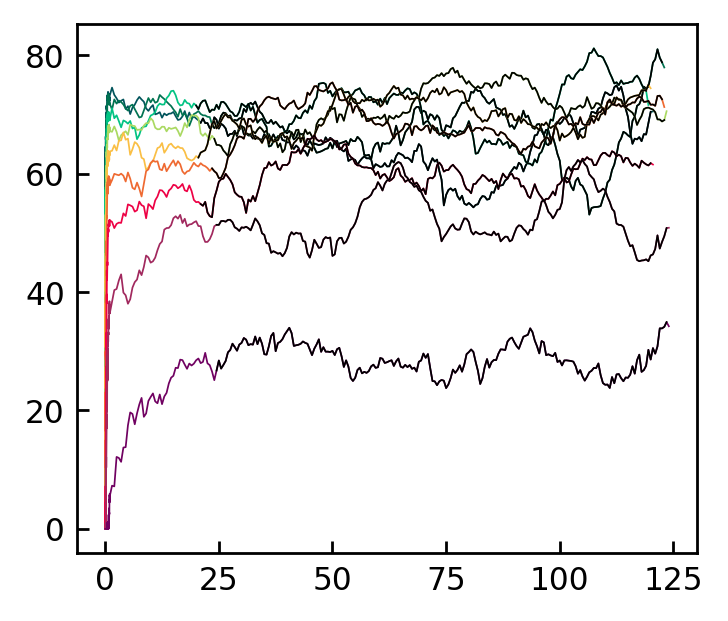

In [9]:
# How many frames to average over for steady-state
avgOver = 200

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
for i in range(0, len(txtFiles)):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in range(0, len(txtFiles)):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(headers) + 1):
        # Compute mean of last 100 entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-avgOver:-1,j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation in this data
        stdError = np.std(all_sims[i].iloc[-avgOver:-1,j])
        stdErr[headers[j-1]][i] = stdError
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
display(SS)
display(stdErr)

# Get an idea for what section of the data we are averaging over
for i in xrange(len(txtFiles)):
    if params['peA'][i] == 0 and params['xA'][i] != 100 and params['xA'][i] != 0:
        plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 label=str(params['xA'][i]))
        plt.plot(all_sims[i]['Timestep'][-avgOver:-1] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][-avgOver:-1] / params['partA'][i] * 100.0,
                 c='k')

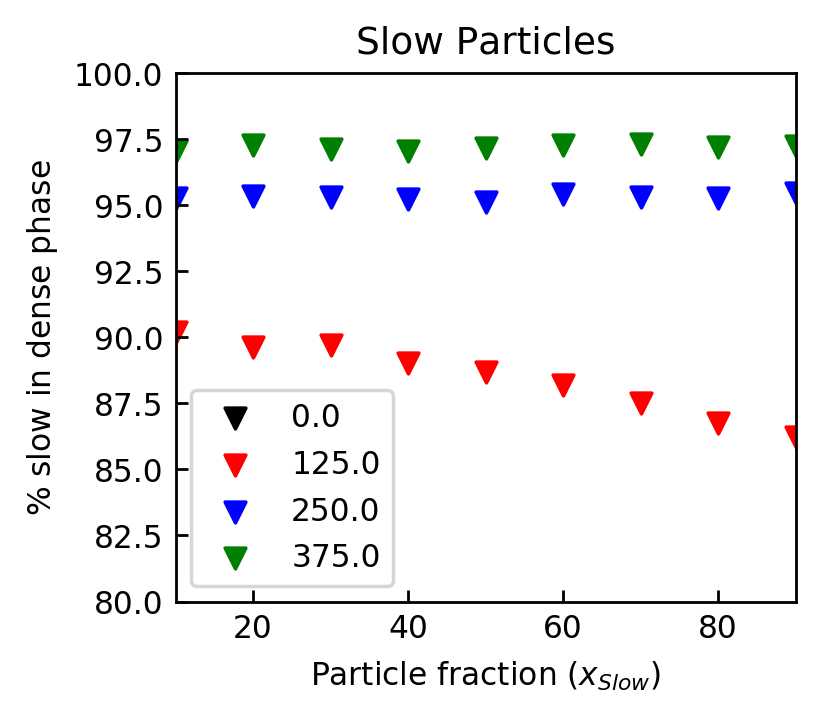

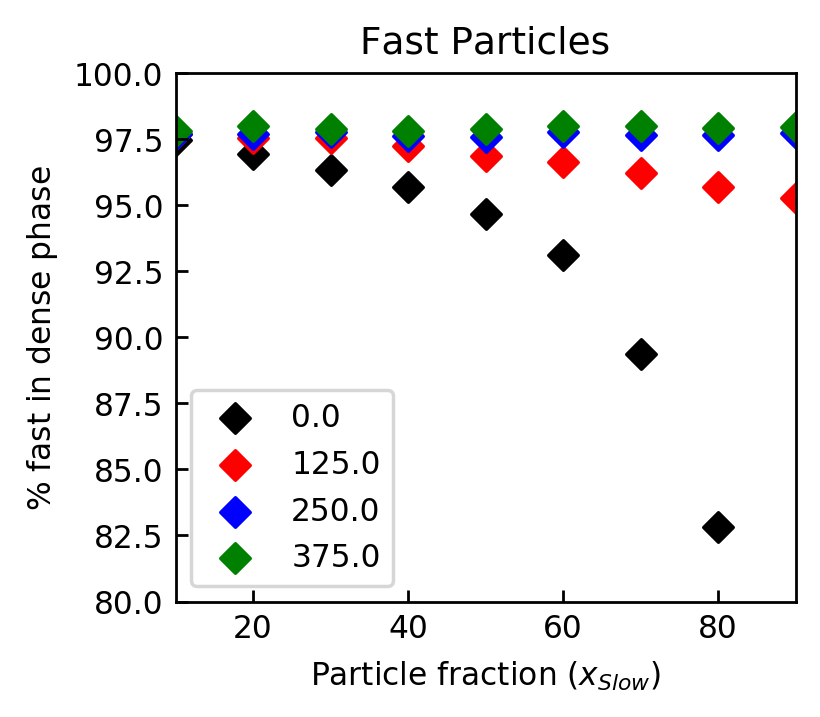

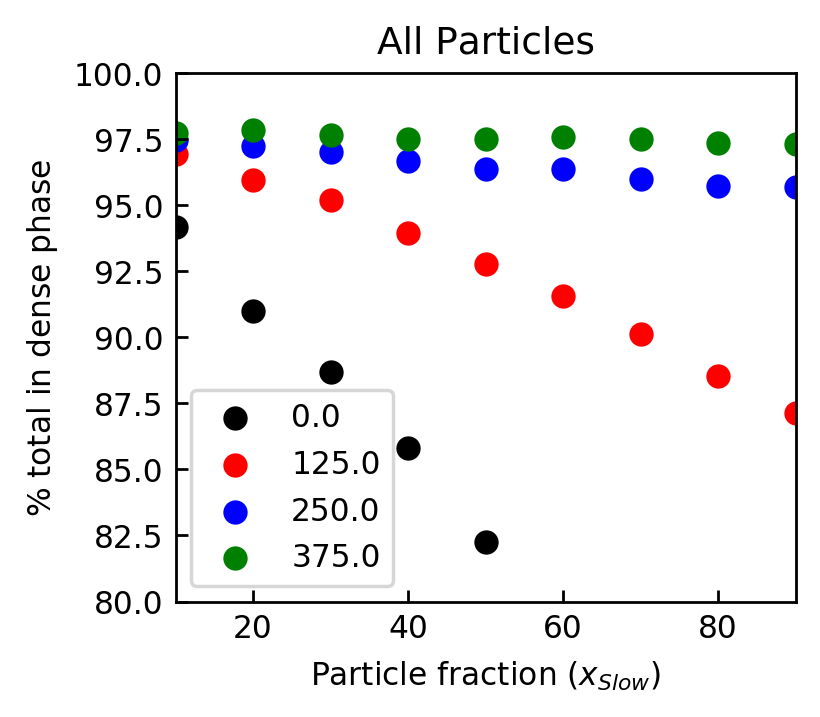

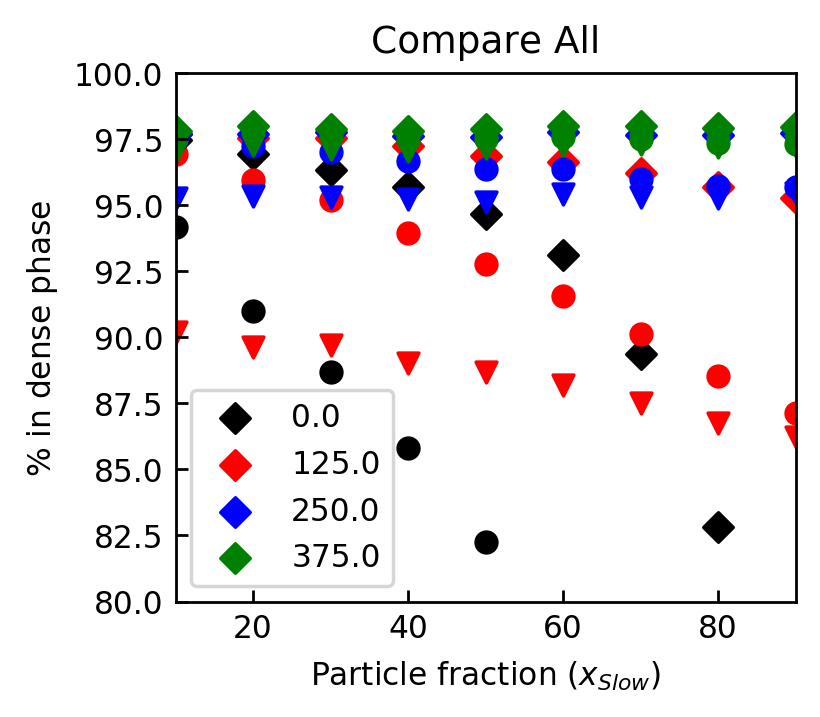

In [10]:
# Get the distinct Pe Slow values
distPeSlow = []
for i in xrange(len(txtFiles)):
    if params['peA'][i] not in distPeSlow:
        distPeSlow.append(params['peA'][i])
        
cols = ['k', 'r', 'b', 'g']
doSort(distPeSlow)

# Plot of only slow particles
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_A'][j], c=cols[i], marker='v', label=str(distPeSlow[i]))
            
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ slow in dense phase')
plt.title('Slow Particles')
plt.show()

# Plot of only fast particles
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_B'][j], c=cols[i], marker='D', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ fast in dense phase')
plt.title('Fast Particles')
plt.show()

# Plot of total percentage
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_tot'][j], c=cols[i], marker='o', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ total in dense phase')
plt.title('All Particles')
plt.show()

# Plot all of the data
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_tot'][j], c=cols[i], marker='o', label=str(distPeSlow[i]))
            plt.scatter(params['xA'][j], SS['Dense_A'][j], c=cols[i], marker='v', label=str(distPeSlow[i]))
            plt.scatter(params['xA'][j], SS['Dense_B'][j], c=cols[i], marker='D', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ in dense phase')
plt.title('Compare All')
plt.show()
            

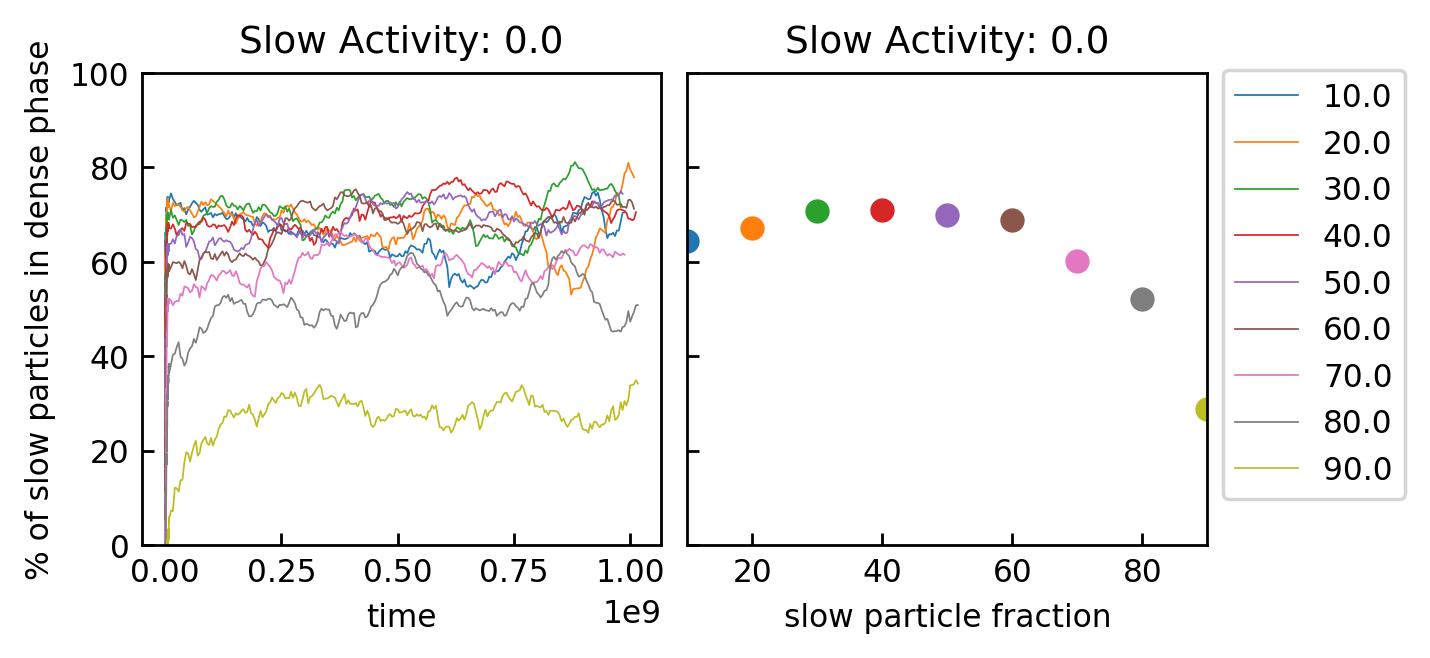

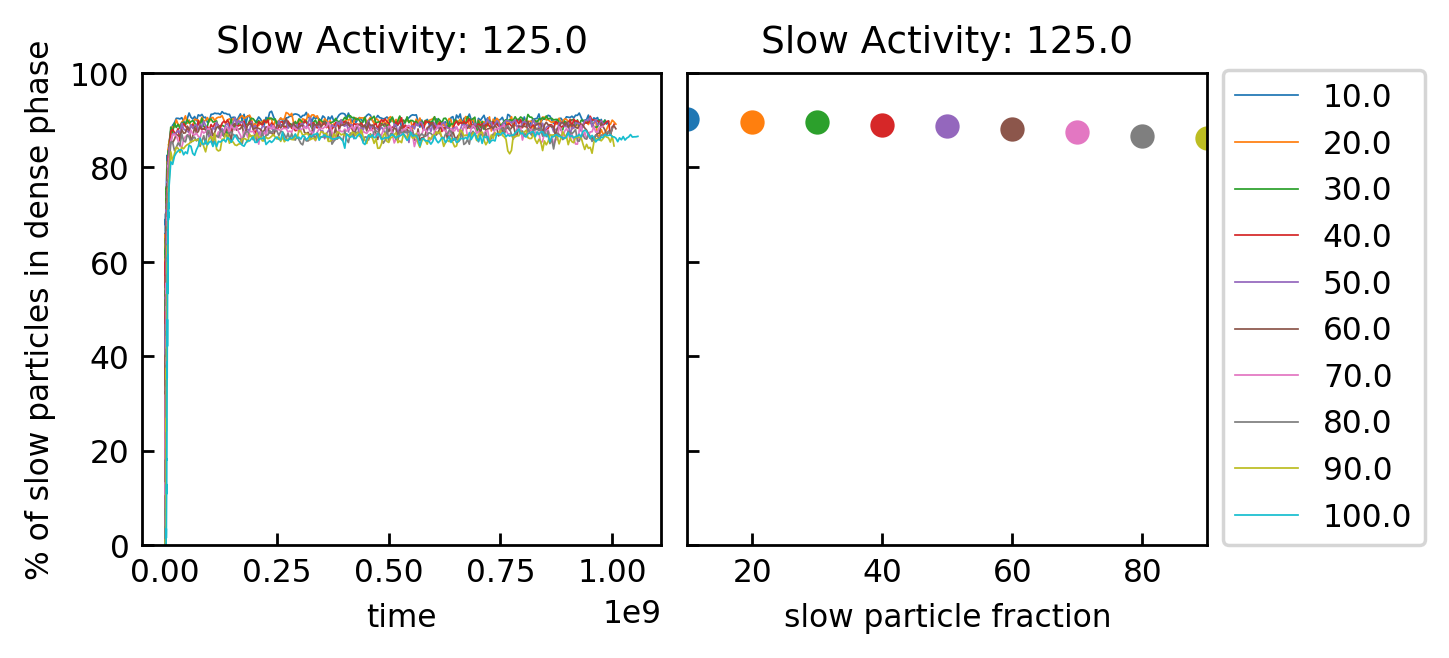

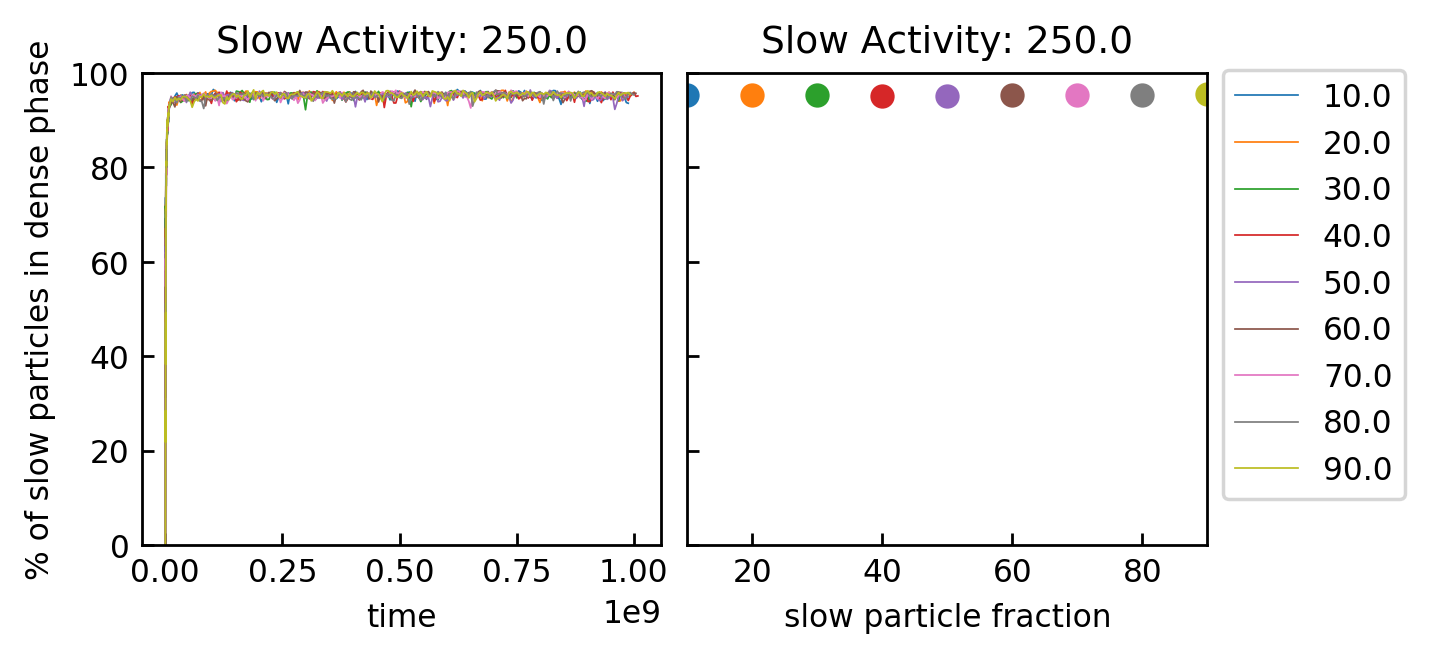

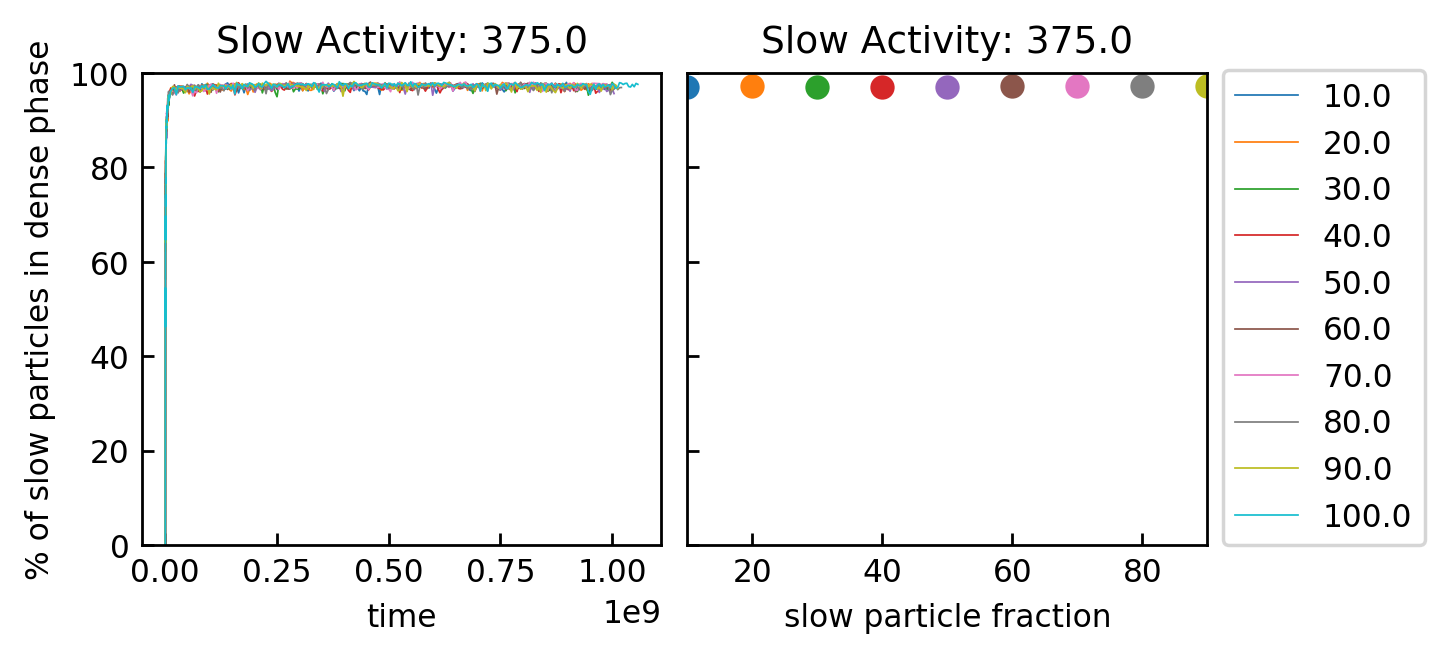

In [11]:
doSort(distPeSlow)

# Get the distinct xA values for each distinct Pe Slow
orderXA = [[] for i in xrange(len(distPeSlow))]
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        if params['peA'][j] == distPeSlow[i]:
            if params['xA'][j] not in orderXA[i]:
                orderXA[i].append(params['xA'][j])

# Now sort each from low to high
for i in xrange(len(orderXA)):
    doSort(orderXA[i])

# Let's plot all simulations for each activity vs. time
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_A'][:] / params['partA'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_A'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of slow particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10, 90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

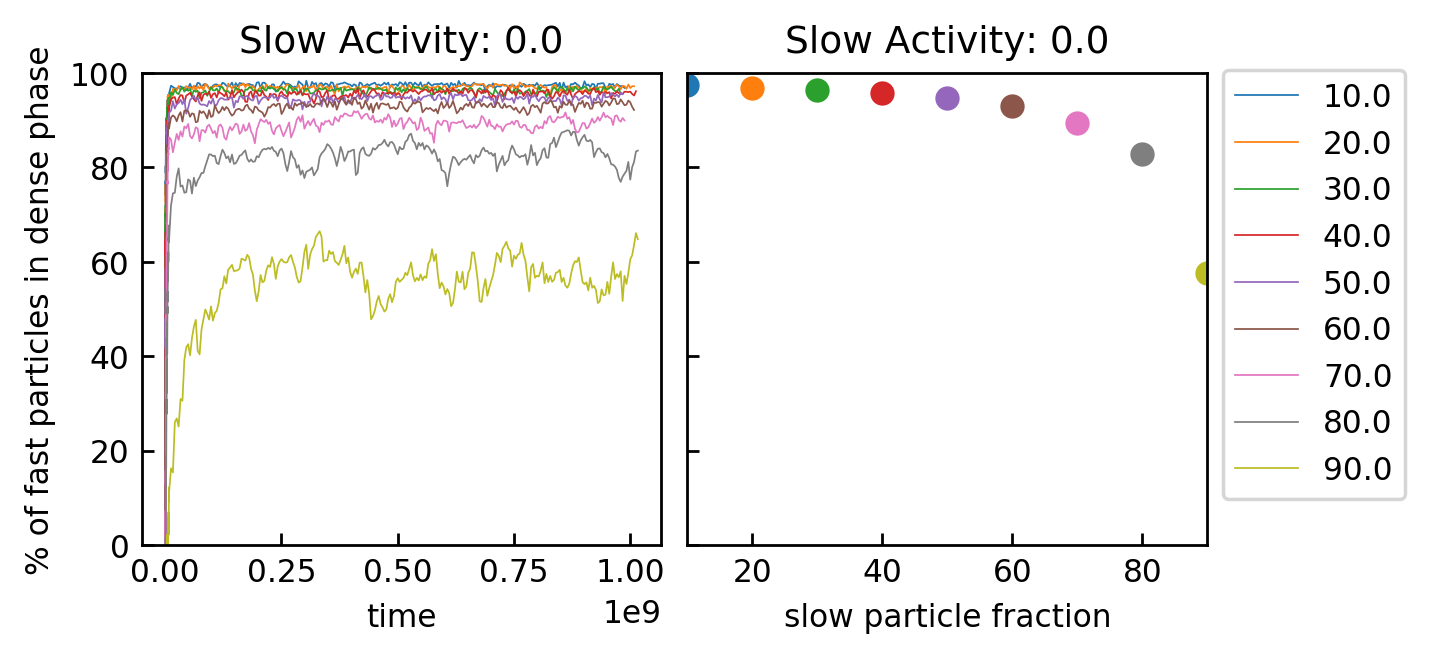

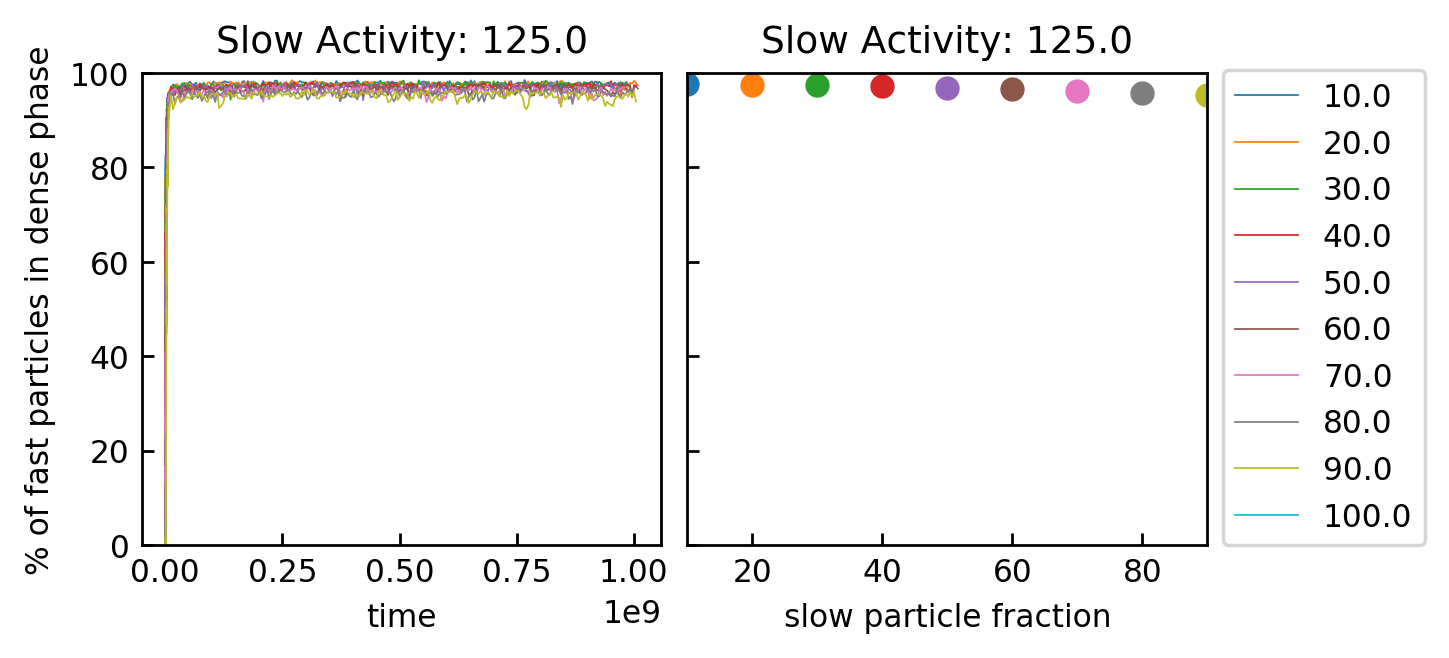

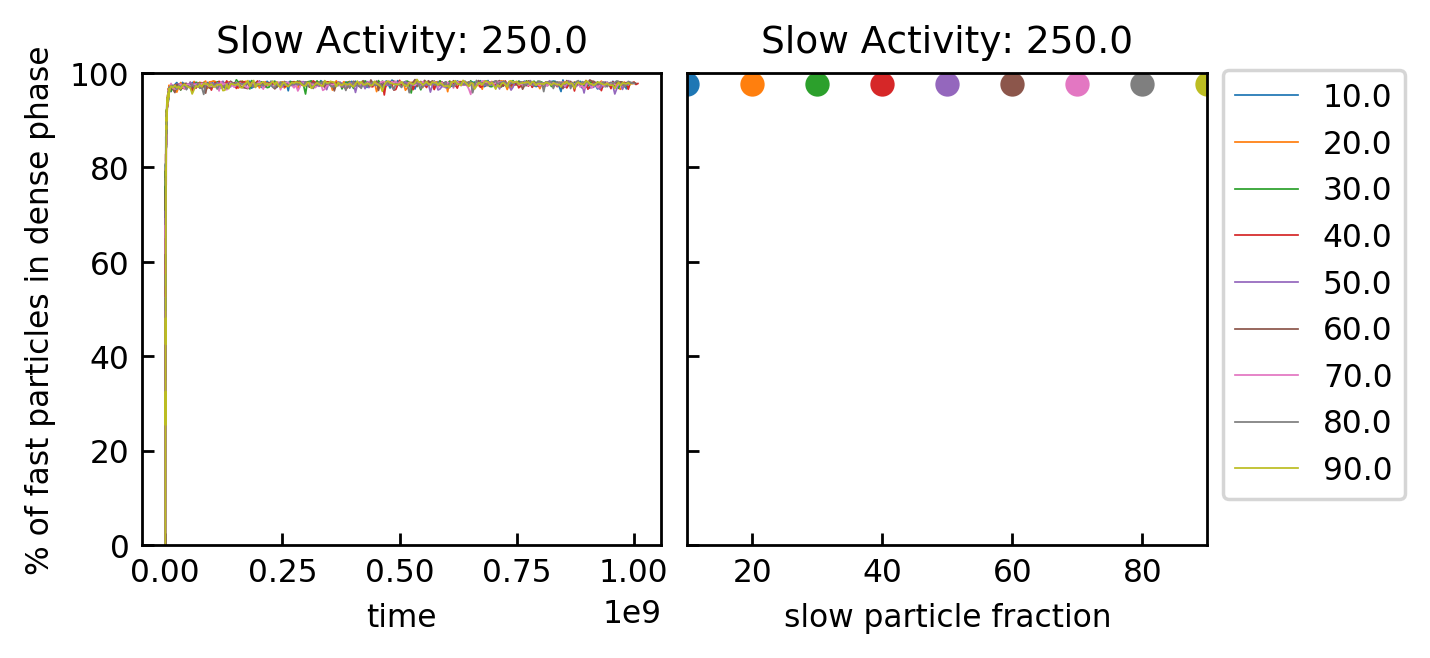

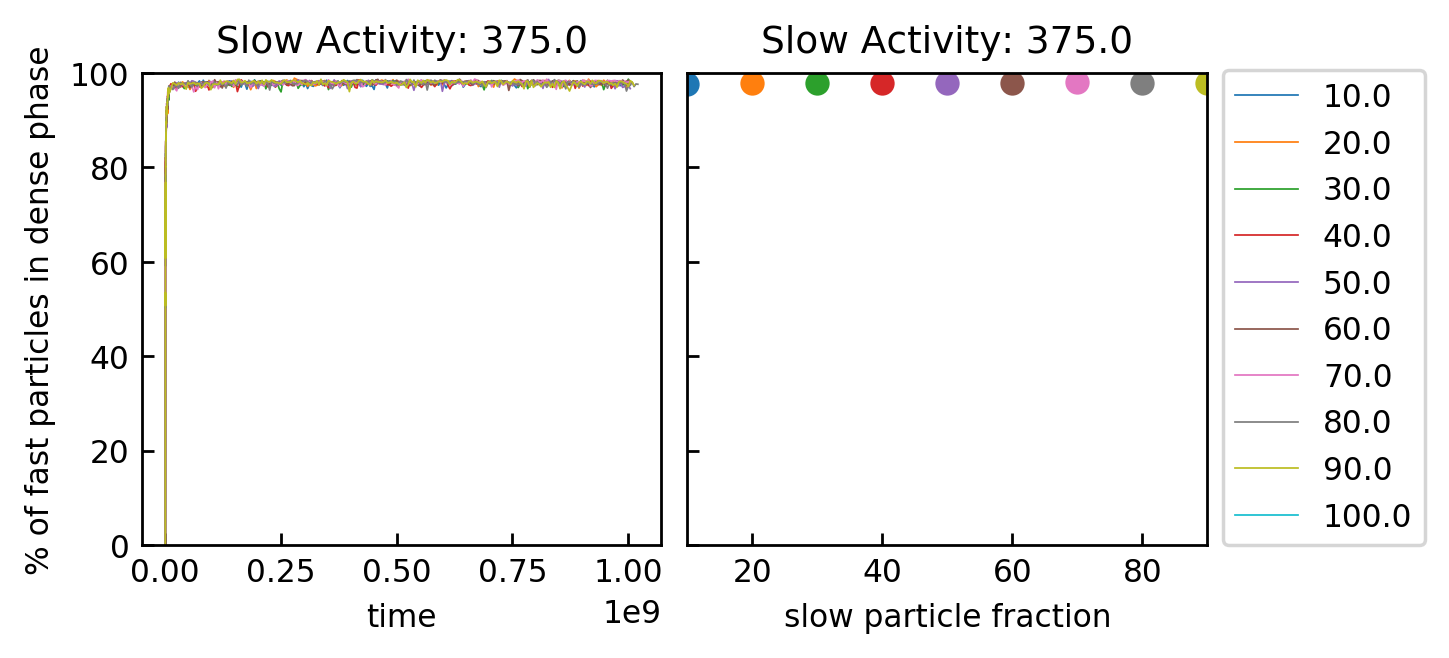

In [12]:
# Dense B
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_B'][:] / params['partB'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_B'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of fast particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10,90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

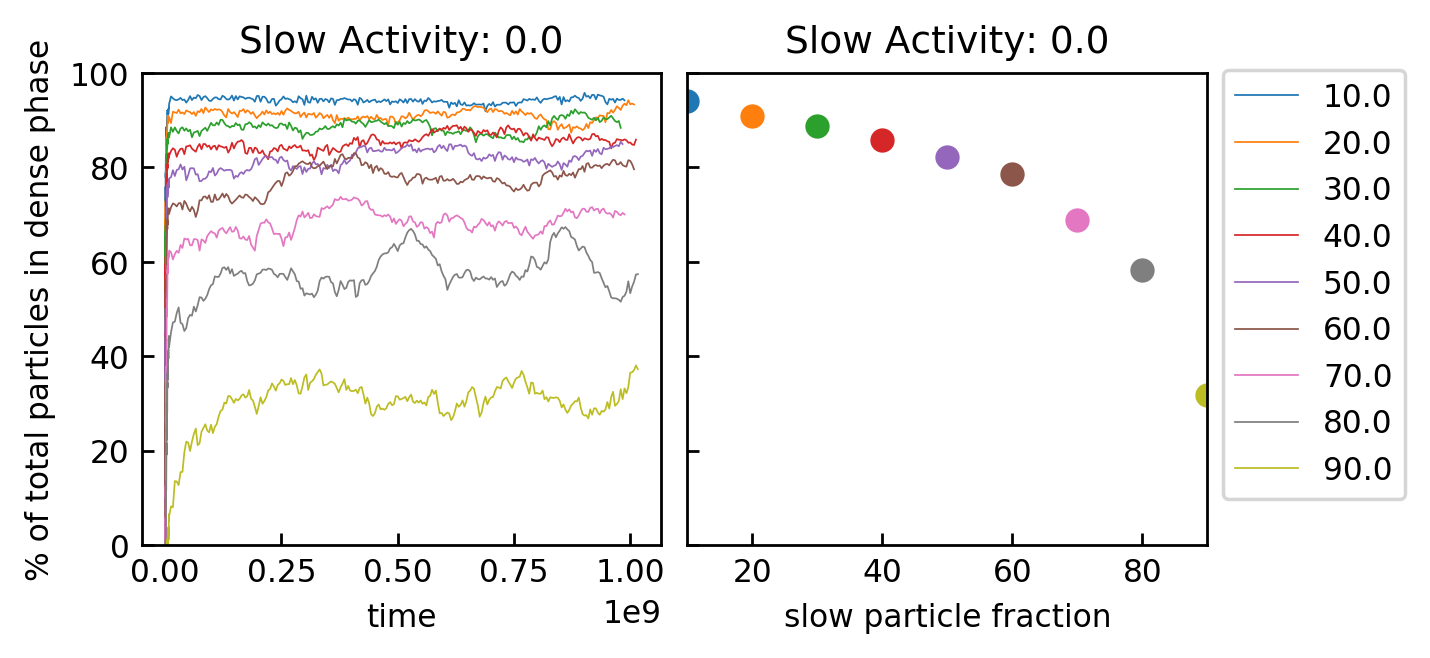

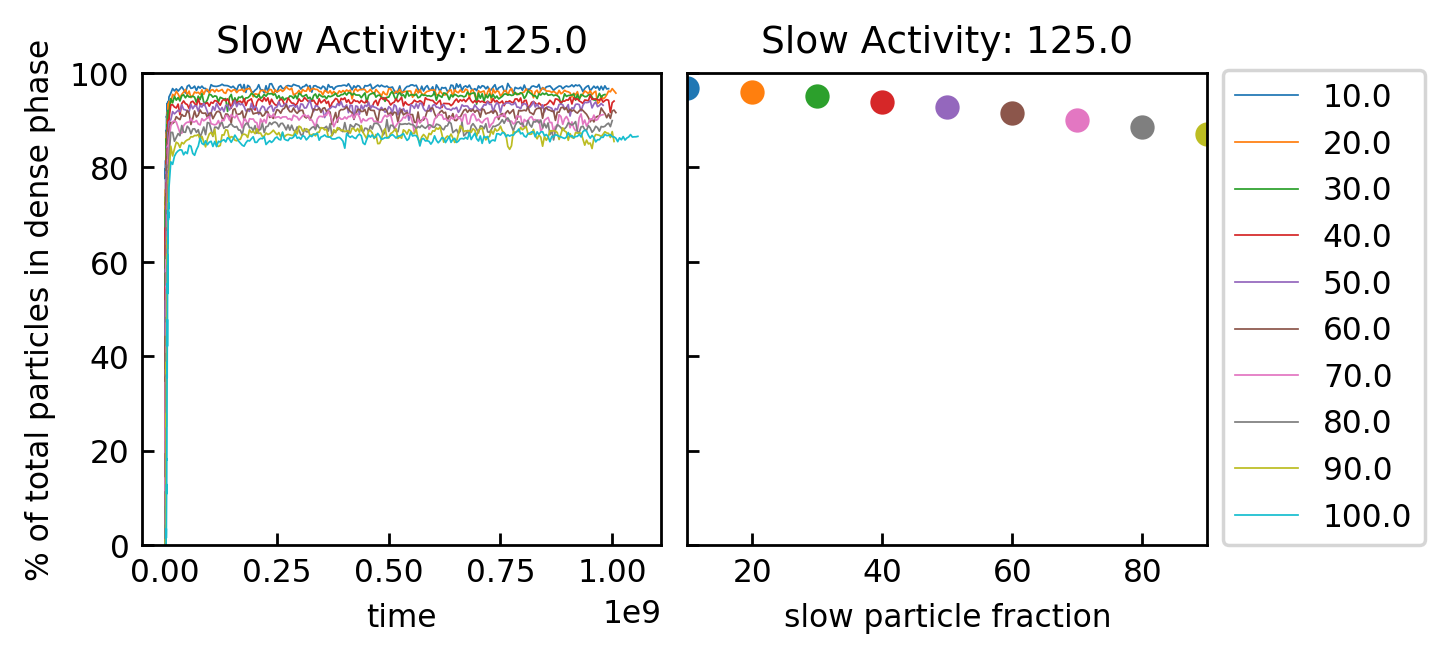

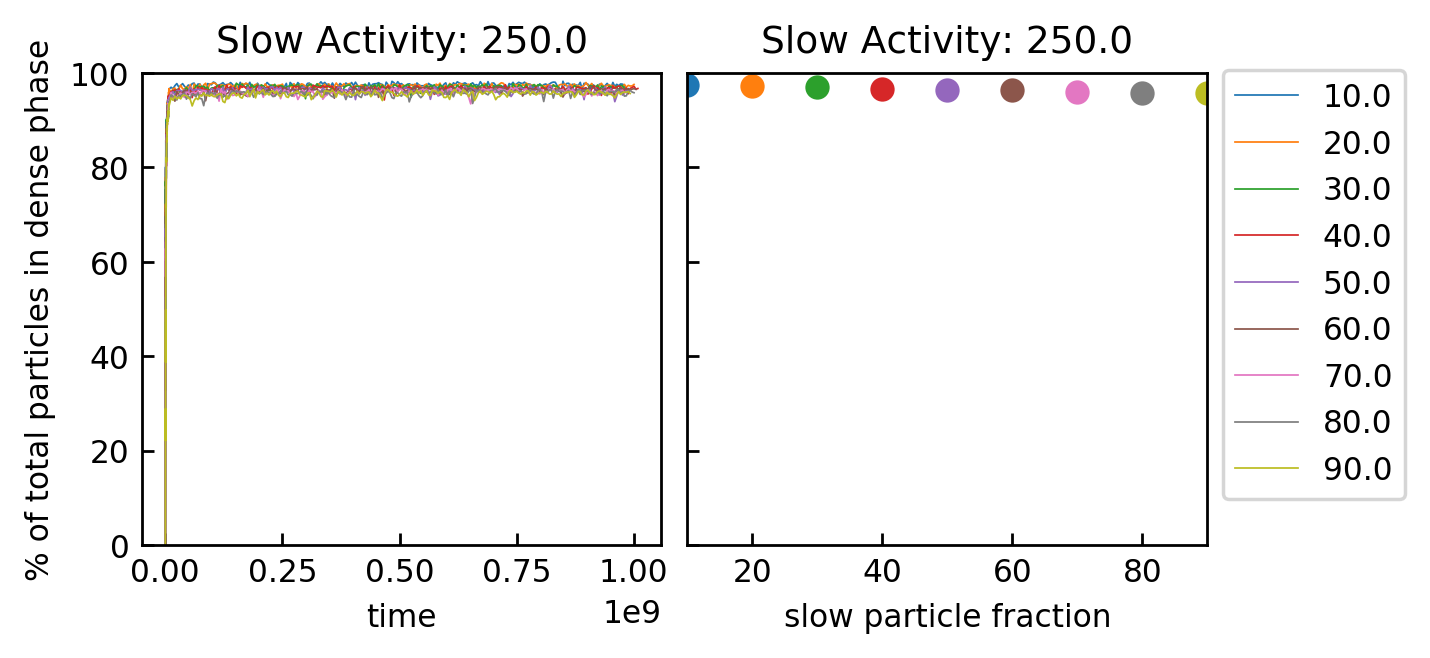

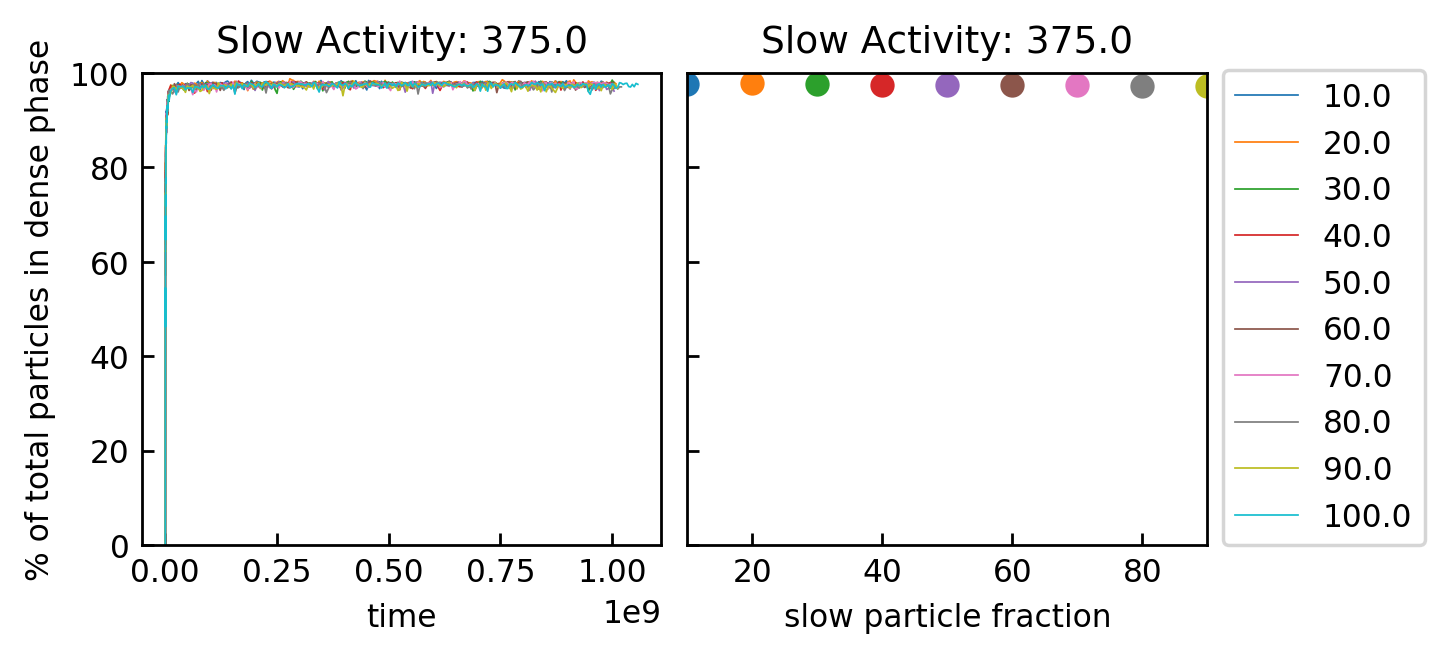

In [13]:
# Dense total
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_tot'][:] / params['partAll'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_tot'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of total particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10,90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

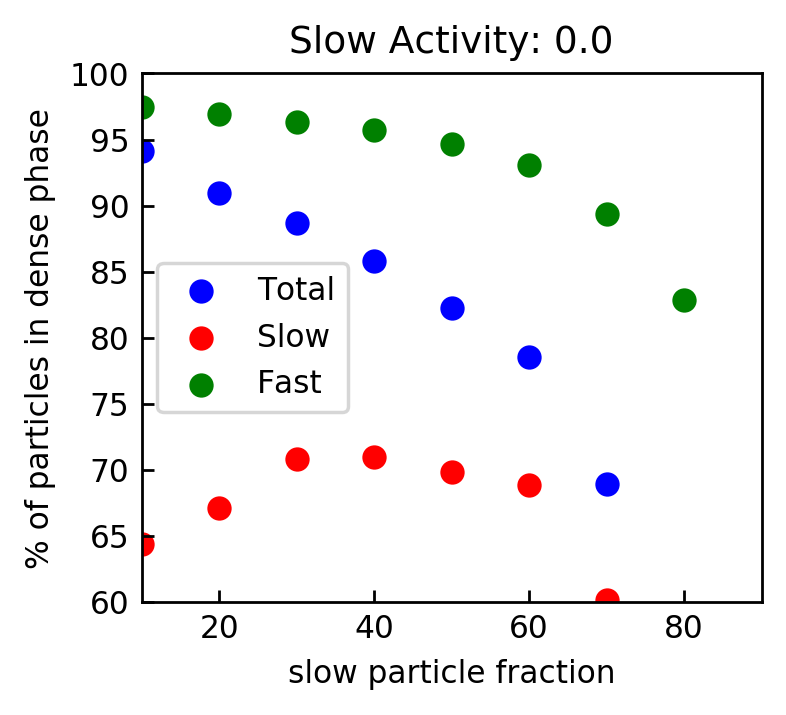

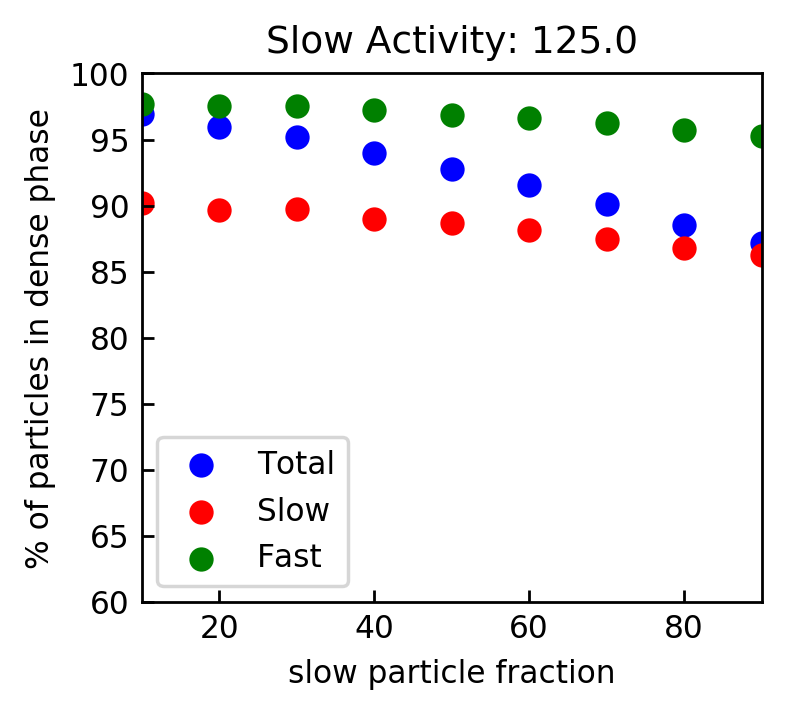

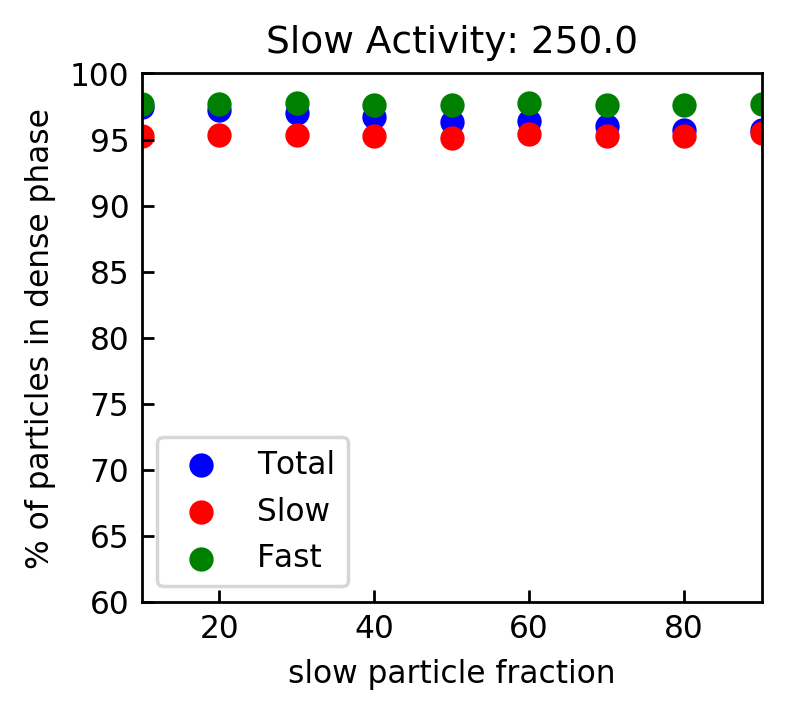

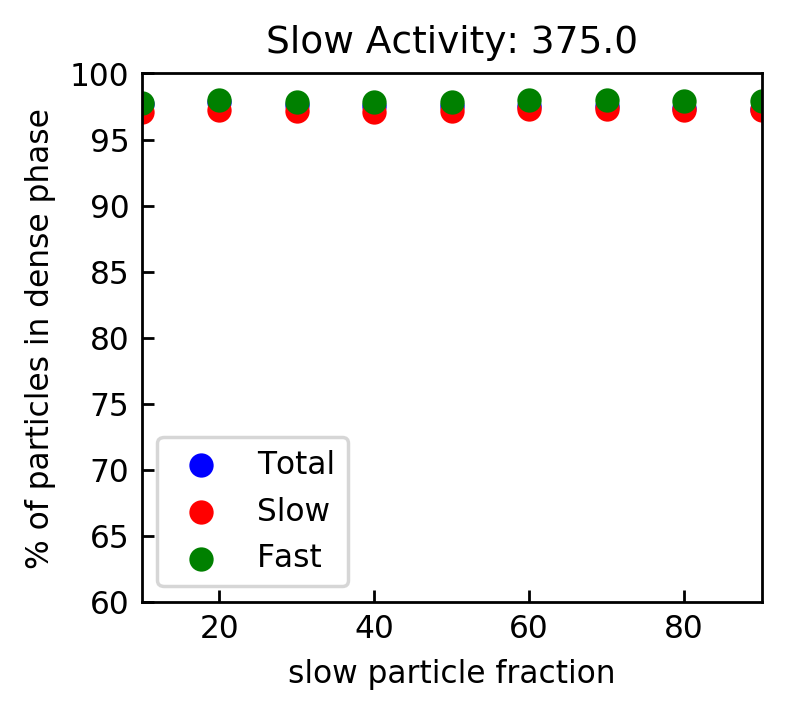

In [14]:
# Plot that compares same Pe simulations A, B, total
for i in xrange(len(distPeSlow)):
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                plt.scatter(params['xA'][k], SS['Dense_tot'][k], c='b', label='Total')
                plt.scatter(params['xA'][k], SS['Dense_A'][k], c='r', label='Slow')
                plt.scatter(params['xA'][k], SS['Dense_B'][k], c='g', label='Fast')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title('Slow Activity: ' + str(distPeSlow[i]))
    plt.xlabel('slow particle fraction')
    plt.ylabel('% of particles in dense phase')
    plt.xlim(10, 90)
    plt.ylim(60, 100)
    plt.show()

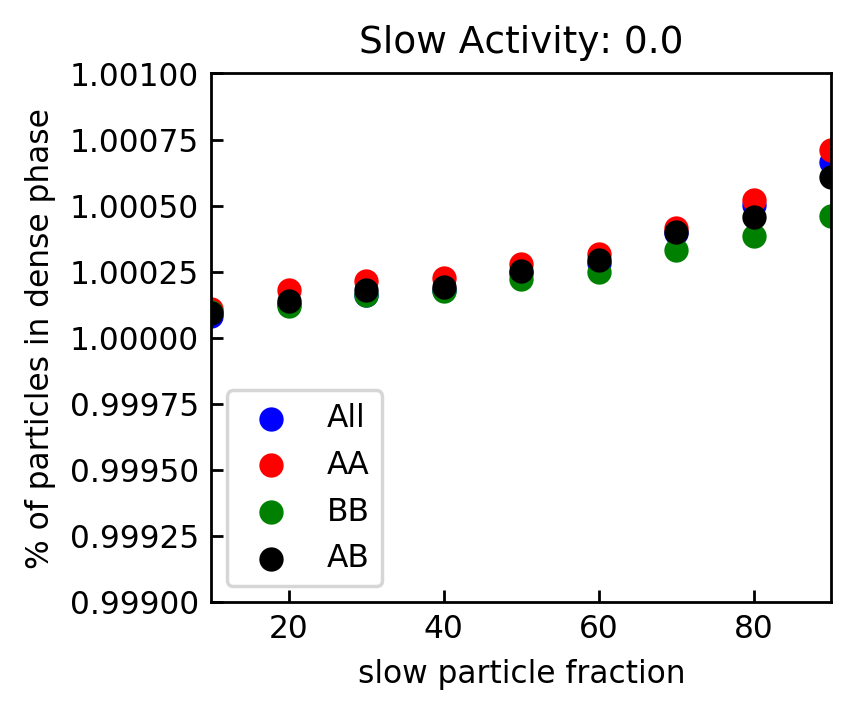

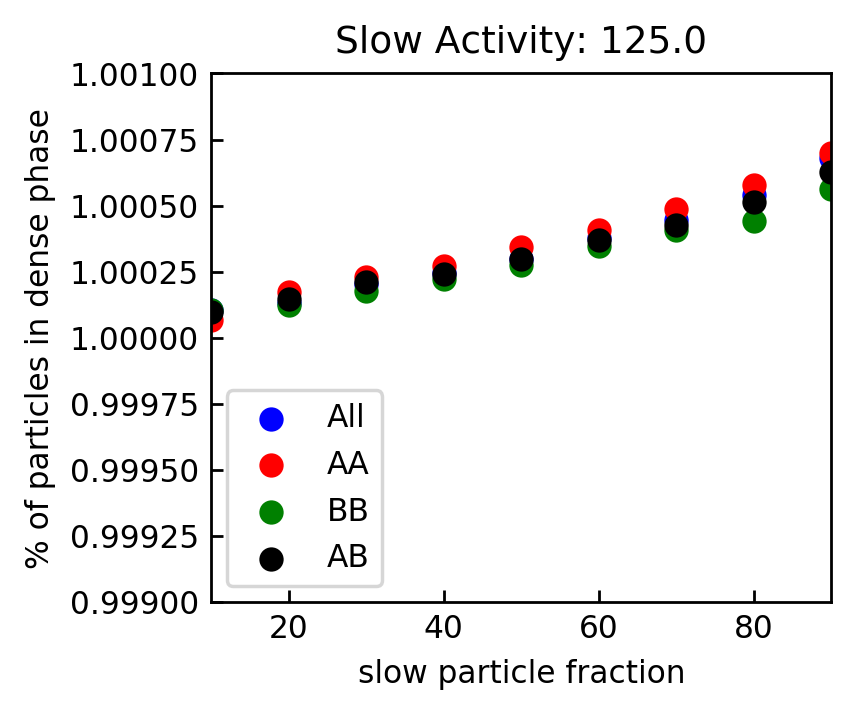

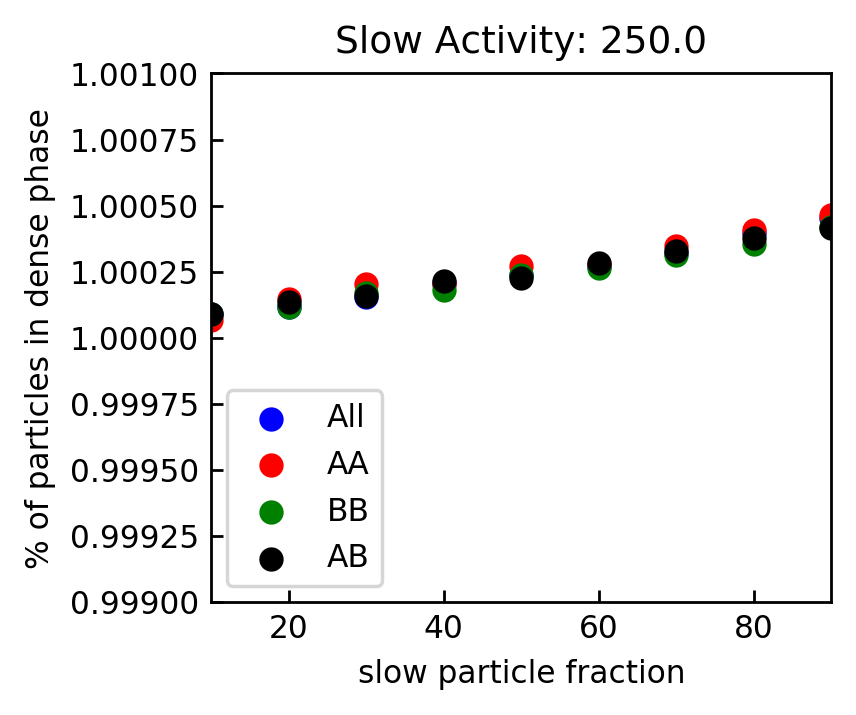

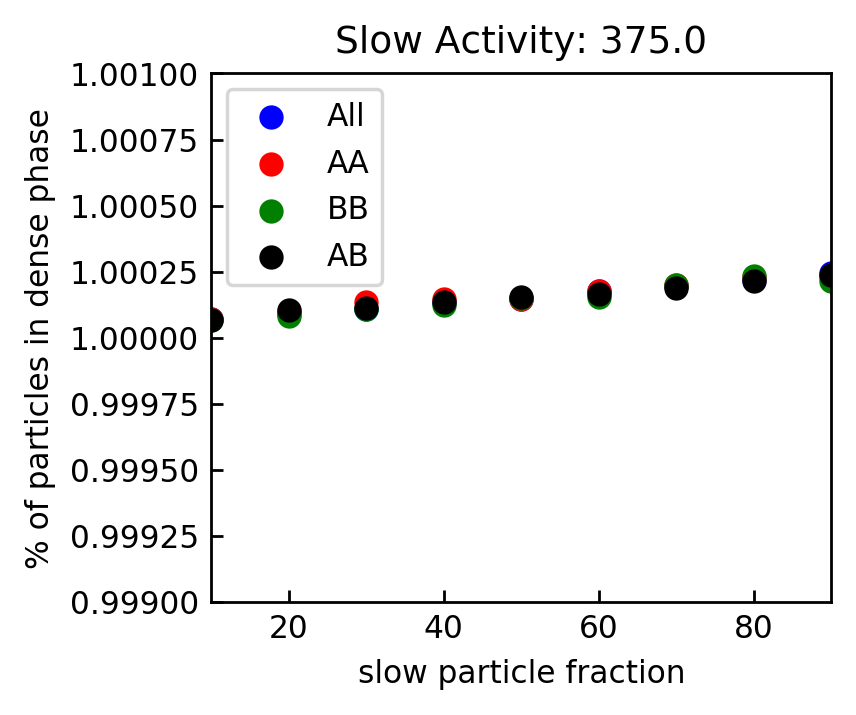

In [15]:
# I need to plot the diameter data
for i in xrange(len(distPeSlow)):
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                plt.scatter(params['xA'][k], SS['sigALL'][k], c='b', label='All')
                plt.scatter(params['xA'][k], SS['sigAA'][k], c='r', label='AA')
                plt.scatter(params['xA'][k], SS['sigBB'][k], c='g', label='BB')
                plt.scatter(params['xA'][k], SS['sigAB'][k], c='k', label='AB')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title('Slow Activity: ' + str(distPeSlow[i]))
    plt.xlabel('slow particle fraction')
    plt.ylabel('% of particles in dense phase')
    plt.xlim(10, 90)
    plt.ylim(0.999, 1.001)
    plt.show()

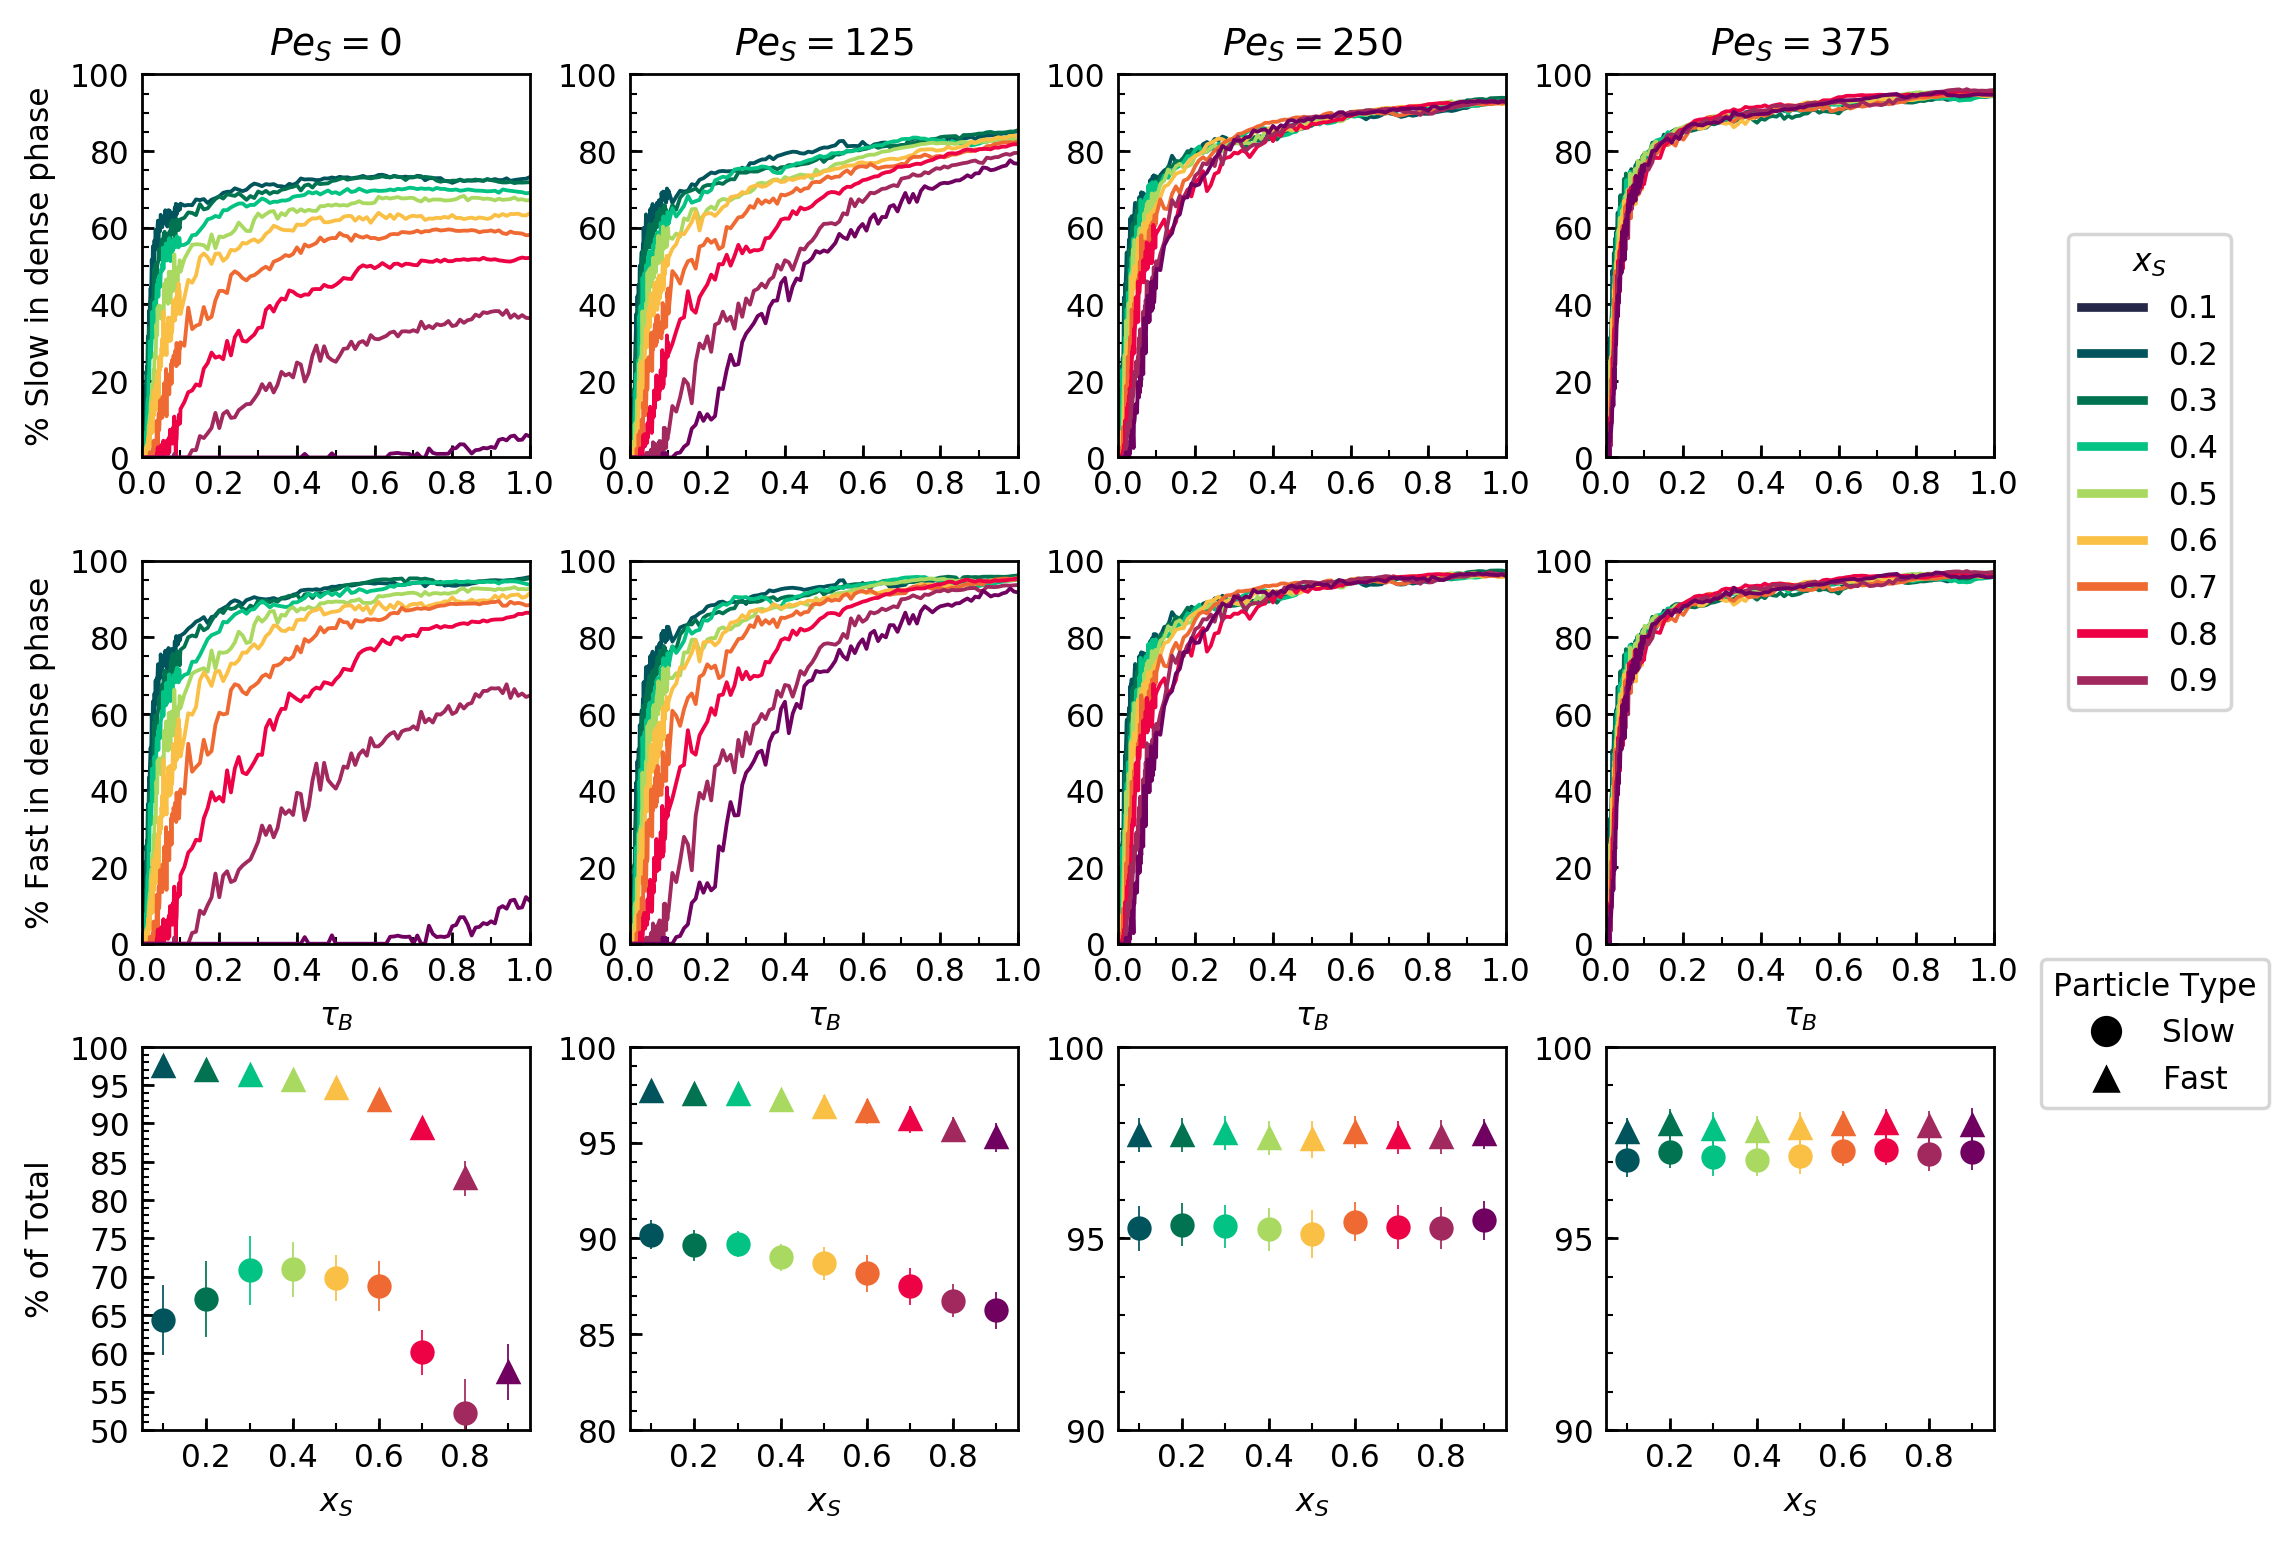

In [16]:
numFiles = len(txtFiles)
mylw = 1.1

# Make the figure plot like I've drawn up in my notes (4x3)
fig = plt.figure(figsize=(8, 6))

### First subplots will be PeS = 0 ###
ax1 = plt.subplot(341)
ax5 = plt.subplot(345)
ax9 = plt.subplot(349)
# ax.set_aspect('equal')
count = 0
for i in xrange(numFiles):
    if params['peA'][i] == distPeSlow[0] and 0 < params['xA'][i] < 100:
        ax1.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax5.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_B'][:] / params['partB'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax9.errorbar(params['xA'][i] / 100, SS['Dense_A'][i], yerr=stdErr['Dense_A'][i],
                     c=getCol(params['xA'][i]), marker='o')
        ax9.errorbar(params['xA'][i] / 100, SS['Dense_B'][i], yerr=stdErr['Dense_B'][i], 
                     c=getCol(params['xA'][i]), marker='^')
        count += 1
#     if params['peA'][i] == distPeSlow[0] and (params['xA'][i] == 0 or params['xA'][i] == 100):
#         # All fast
#         if params['xA'][i] == 0:
#             ax9.axhline(y=SS['Dense_B'][i], label='Monodisperse Fast', lw=1.5)
#         # All slow
#         if params['xA'][i] == 100:
#             ax9.axhline(y=SS['Dense_A'][i], label='Monodisperse Slow', lw=1.5)

ax1.set_title(r'$Pe_{S}=0$')
ax1.set_ylabel(r'% Slow in dense phase')
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 100.0)
ax5.set_xlabel(r'$\tau_{B}$')
ax5.set_ylabel(r'% Fast in dense phase')
ax5.set_xlim(0, 1.0)
ax5.set_ylim(0, 100.0)
ax9.set_xlabel(r'$x_{S}$')
ax9.set_ylabel('% of Total')
ax9.set_xlim(0.05, 0.95)
ax9.set_ylim(50, 100)

### Next subplots will be PeS = 125 ###
ax2 = plt.subplot(342)
ax6 = plt.subplot(346)
ax10 = plt.subplot(3, 4, 10)
# ax.set_aspect('equal')
for i in xrange(numFiles):
    if params['peA'][i] == distPeSlow[1] and 0 < params['xA'][i] < 100:
        ax2.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax6.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_B'][:] / params['partB'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax10.errorbar(params['xA'][i] / 100, SS['Dense_A'][i], yerr=stdErr['Dense_A'][i],
                      c=getCol(params['xA'][i]), marker='o')
        ax10.errorbar(params['xA'][i] / 100, SS['Dense_B'][i], yerr=stdErr['Dense_B'][i],
                      c=getCol(params['xA'][i]), marker='^')
#     if params['peA'][i] == distPeSlow[1] and (params['xA'][i] == 0 or params['xA'][i] == 100):
#         # All fast
#         if params['xA'][i] == 0:
#             ax10.axhline(y=SS['Dense_B'][i], label='Monodisperse Fast', lw=1.5)
#         # All slow
#         if params['xA'][i] == 100:
#             ax10.axhline(y=SS['Dense_A'][i], label='Monodisperse Slow', lw=1.5)
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 100.0)
ax2.set_title(r'$Pe_{S}=125$')
ax6.set_xlabel(r'$\tau_{B}$')
ax6.set_xlim(0, 1.0)
ax6.set_ylim(0, 100.0)
ax10.set_xlabel(r'$x_{S}$')
ax10.set_xlim(0.05, 0.95)
ax10.set_ylim(80, 100)

### Next subplots will be PeS = 250 ###
ax3 = plt.subplot(343)
ax7 = plt.subplot(347)
ax11 = plt.subplot(3, 4, 11)
# ax.set_aspect('equal')
for i in xrange(numFiles):
    if params['peA'][i] == distPeSlow[2] and 0 < params['xA'][i] < 100:
        ax3.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax7.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_B'][:] / params['partB'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax11.errorbar(params['xA'][i] / 100, SS['Dense_A'][i], yerr=stdErr['Dense_A'][i],
                      c=getCol(params['xA'][i]), marker='o')
        ax11.errorbar(params['xA'][i] / 100, SS['Dense_B'][i], yerr=stdErr['Dense_B'][i],
                      c=getCol(params['xA'][i]), marker='^')
#     if params['peA'][i] == distPeSlow[2] and (params['xA'][i] == 0 or params['xA'][i] == 100):
#         # All fast
#         if params['xA'][i] == 0:
#             ax11.axhline(y=SS['Dense_B'][i], label='Monodisperse Fast', lw=1.5)
#         # All slow
#         if params['xA'][i] == 100:
#             ax11.axhline(y=SS['Dense_A'][i], label='Monodisperse Slow', lw=1.5)
ax3.set_xlim(0, 1.0)
ax3.set_title(r'$Pe_{S}=250$')
ax3.set_ylim(0, 100.0)
ax7.set_xlabel(r'$\tau_{B}$')
ax7.set_xlim(0, 1.0)
ax7.set_ylim(0, 100.0)
ax11.set_xlabel(r'$x_{S}$')
ax11.set_xlim(0.05, 0.95)
ax11.set_ylim(90, 100)

### Next subplots will be PeS = 375 ###
ax4 = plt.subplot(344)
ax8 = plt.subplot(348)
ax12 = plt.subplot(3, 4, 12)
# ax.set_aspect('equal')
for i in xrange(numFiles):
    if params['peA'][i] == distPeSlow[3] and 0 < params['xA'][i] < 100:
        ax4.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax8.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_B'][:] / params['partB'][i] * 100.0,
                 c=getCol(params['xA'][i]),
                 lw=mylw,
                 label=str(params['xA'][i]))
        ax12.errorbar(params['xA'][i] / 100, SS['Dense_A'][i], yerr=stdErr['Dense_A'][i],
                      c=getCol(params['xA'][i]), marker='o')
        ax12.errorbar(params['xA'][i] / 100, SS['Dense_B'][i], yerr=stdErr['Dense_B'][i],
                      c=getCol(params['xA'][i]), marker='^')
#     if params['peA'][i] == distPeSlow[3] and (params['xA'][i] == 0 or params['xA'][i] == 100):
#         # All fast
#         if params['xA'][i] == 0:
#             ax12.axhline(y=SS['Dense_B'][i], label='Monodisperse Fast', lw=1.5)
#         # All slow
#         if params['xA'][i] == 100:
#             ax12.axhline(y=SS['Dense_A'][i], label='Monodisperse Slow', lw=1.5)
ax4.set_title(r'$Pe_{S}=375$')
ax4.set_xlim(0, 1.0)
ax4.set_ylim(0, 100.0)
ax8.set_xlabel(r'$\tau_{B}$')
ax8.set_xlim(0, 1.0)
ax8.set_ylim(0, 100.0)
ax12.set_xlabel(r'$x_{S}$')
ax12.set_xlim(0.05, 0.95)
ax12.set_ylim(90, 100)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)

leglw = 2.5
legend_elements = [Line2D([0], [0], color=myCols[0], lw=leglw, label=r'$0.1$'),
                   Line2D([0], [0], color=myCols[1], lw=leglw, label=r'$0.2$'),
                   Line2D([0], [0], color=myCols[2], lw=leglw, label=r'$0.3$'),
                   Line2D([0], [0], color=myCols[3], lw=leglw, label=r'$0.4$'),
                   Line2D([0], [0], color=myCols[4], lw=leglw, label=r'$0.5$'),
                   Line2D([0], [0], color=myCols[5], lw=leglw, label=r'$0.6$'),
                   Line2D([0], [0], color=myCols[6], lw=leglw, label=r'$0.7$'),
                   Line2D([0], [0], color=myCols[7], lw=leglw, label=r'$0.8$'),
                   Line2D([0], [0], color=myCols[8], lw=leglw, label=r'$0.9$'),
                  ]
leg2 = [Line2D([0], [0], marker='o', color='w', label='Slow', markerfacecolor='k', markersize=10),
        Line2D([0], [0], marker='^', color='w', label='Fast', markerfacecolor='k', markersize=10)
       ]
ax4.legend(title=r'$x_{S}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.65, -0.7))
ax12.legend(title=r'Particle Type', handles=leg2, loc = 4, bbox_to_anchor=(1.75, 0.8))

# Set ticks for each plot:
### TOP ROW ###
minorLocator = MultipleLocator(0.1)
majorLocator = MultipleLocator(0.2)
ax1.xaxis.set_major_locator(majorLocator)
ax2.xaxis.set_major_locator(majorLocator)
ax3.xaxis.set_major_locator(majorLocator)
ax4.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax3.xaxis.set_minor_locator(minorLocator)
ax4.xaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(5)
majorLocator = MultipleLocator(20)
ax1.yaxis.set_major_locator(majorLocator)
ax2.yaxis.set_major_locator(majorLocator)
ax3.yaxis.set_major_locator(majorLocator)
ax4.yaxis.set_major_locator(majorLocator)
ax1.yaxis.set_minor_locator(minorLocator)
ax2.yaxis.set_minor_locator(minorLocator)
ax3.yaxis.set_minor_locator(minorLocator)
ax4.yaxis.set_minor_locator(minorLocator)

### SECOND ROW ###
minorLocator = MultipleLocator(0.1)
majorLocator = MultipleLocator(0.2)
ax5.xaxis.set_major_locator(majorLocator)
ax6.xaxis.set_major_locator(majorLocator)
ax7.xaxis.set_major_locator(majorLocator)
ax8.xaxis.set_major_locator(majorLocator)
ax5.xaxis.set_minor_locator(minorLocator)
ax6.xaxis.set_minor_locator(minorLocator)
ax7.xaxis.set_minor_locator(minorLocator)
ax8.xaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(5)
majorLocator = MultipleLocator(20)
ax5.yaxis.set_major_locator(majorLocator)
ax6.yaxis.set_major_locator(majorLocator)
ax7.yaxis.set_major_locator(majorLocator)
ax8.yaxis.set_major_locator(majorLocator)
ax5.yaxis.set_minor_locator(minorLocator)
ax6.yaxis.set_minor_locator(minorLocator)
ax7.yaxis.set_minor_locator(minorLocator)
ax8.yaxis.set_minor_locator(minorLocator)

### LAST ROW ###
minorLocator = MultipleLocator(0.1)
majorLocator = MultipleLocator(0.2)
ax9.xaxis.set_major_locator(majorLocator)
ax10.xaxis.set_major_locator(majorLocator)
ax11.xaxis.set_major_locator(majorLocator)
ax12.xaxis.set_major_locator(majorLocator)
ax9.xaxis.set_minor_locator(minorLocator)
ax10.xaxis.set_minor_locator(minorLocator)
ax11.xaxis.set_minor_locator(minorLocator)
ax12.xaxis.set_minor_locator(minorLocator)

ax9.yaxis.set_major_locator(MultipleLocator(5))
ax10.yaxis.set_major_locator(MultipleLocator(5))
ax11.yaxis.set_major_locator(MultipleLocator(5))
ax12.yaxis.set_major_locator(MultipleLocator(5))
ax9.yaxis.set_minor_locator(MultipleLocator(1))
ax10.yaxis.set_minor_locator(MultipleLocator(1))
ax11.yaxis.set_minor_locator(MultipleLocator(1))
ax12.yaxis.set_minor_locator(MultipleLocator(1))

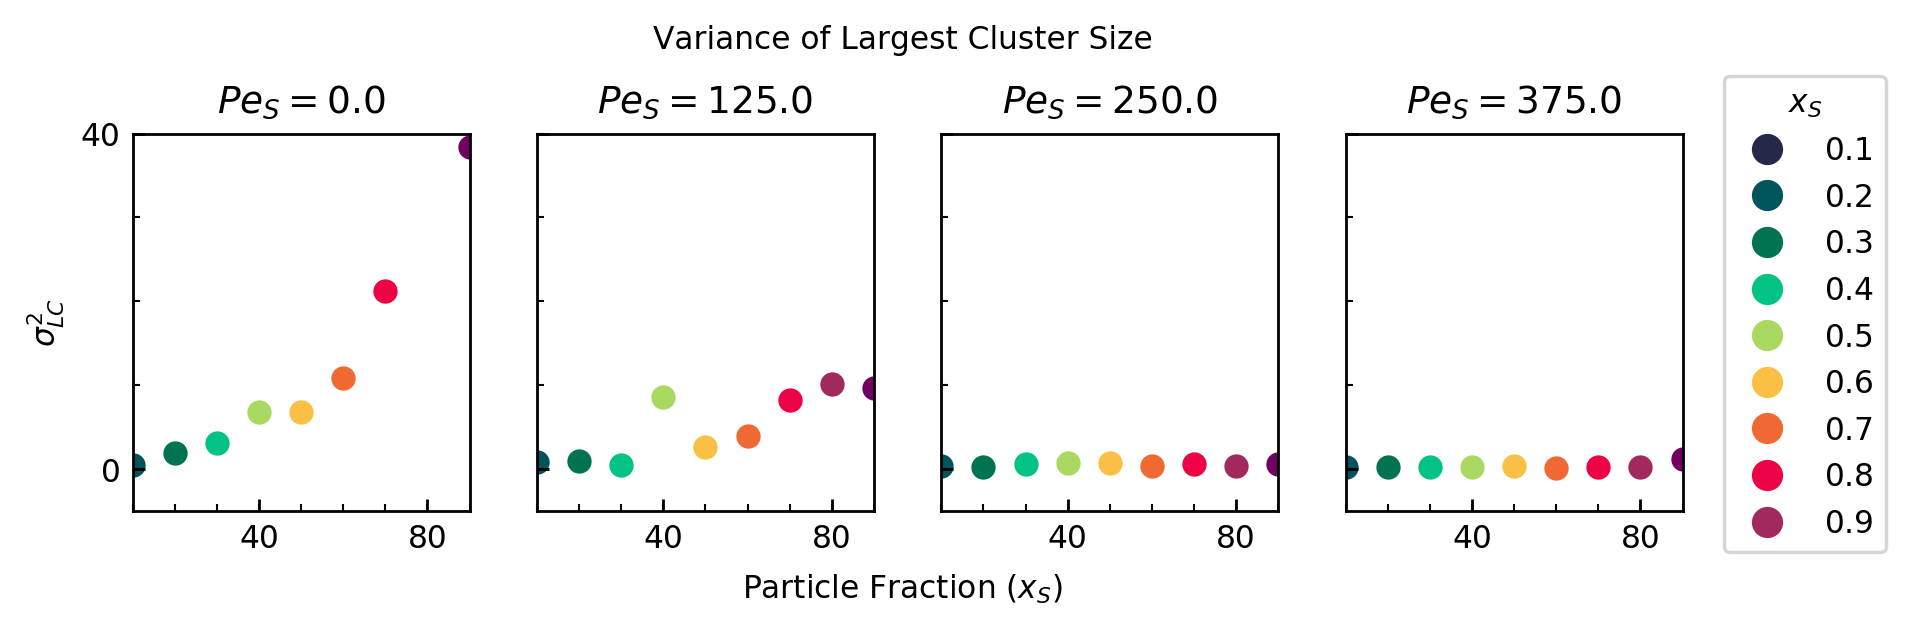

In [17]:
# Plot the variance as a function of activity, and as function of particle fraction
clustVar = []
for i in xrange(numFiles):
    clustVar.append((stdErr['Lg_clust'][i])**2)
    
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))
for i in xrange(numFiles):
    for j in xrange(len(distPeSlow)):
        if params['peA'][i] == distPeSlow[j] and params['xA'][i] != 100 and params['xA'][i] != 0:
            ax[j].scatter(params['xA'][i], clustVar[i],
                          c=getCol(params['xA'][i])
                         )
            # Set x axis values
            ax[j].set_xlim(10, 90)
            ax[j].xaxis.set_major_locator(MultipleLocator(40))
            ax[j].xaxis.set_minor_locator(MultipleLocator(10))
            # Set y axis values
            ax[j].set_ylim(-5, 40)
            ax[j].yaxis.set_major_locator(MultipleLocator(40))
            ax[j].yaxis.set_minor_locator(MultipleLocator(10))
            ax[j].set_title(r'$Pe_{S}=$' + str(params['peA'][i]))
ax[0].set_ylabel(r'$\sigma_{LC}^{2}$')
fig.text(0.51, 1.05, 'Variance of Largest Cluster Size', ha='center')
fig.text(0.51, -0.05, r'Particle Fraction $(x_{S})$', ha='center')

msz = 10
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[0], markersize=msz, label=r'$0.1$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[1], markersize=msz, label=r'$0.2$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[2], markersize=msz, label=r'$0.3$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[3], markersize=msz, label=r'$0.4$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[4], markersize=msz, label=r'$0.5$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[5], markersize=msz, label=r'$0.6$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[6], markersize=msz, label=r'$0.7$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[7], markersize=msz, label=r'$0.8$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[8], markersize=msz, label=r'$0.9$')]
plt.legend(title=r'$x_{S}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.65, -0.15))

plt.show()


Standard deviation of %A particles in dense phase: 4.58321311236
Variance of %A particles in dense phase: 21.0058424333


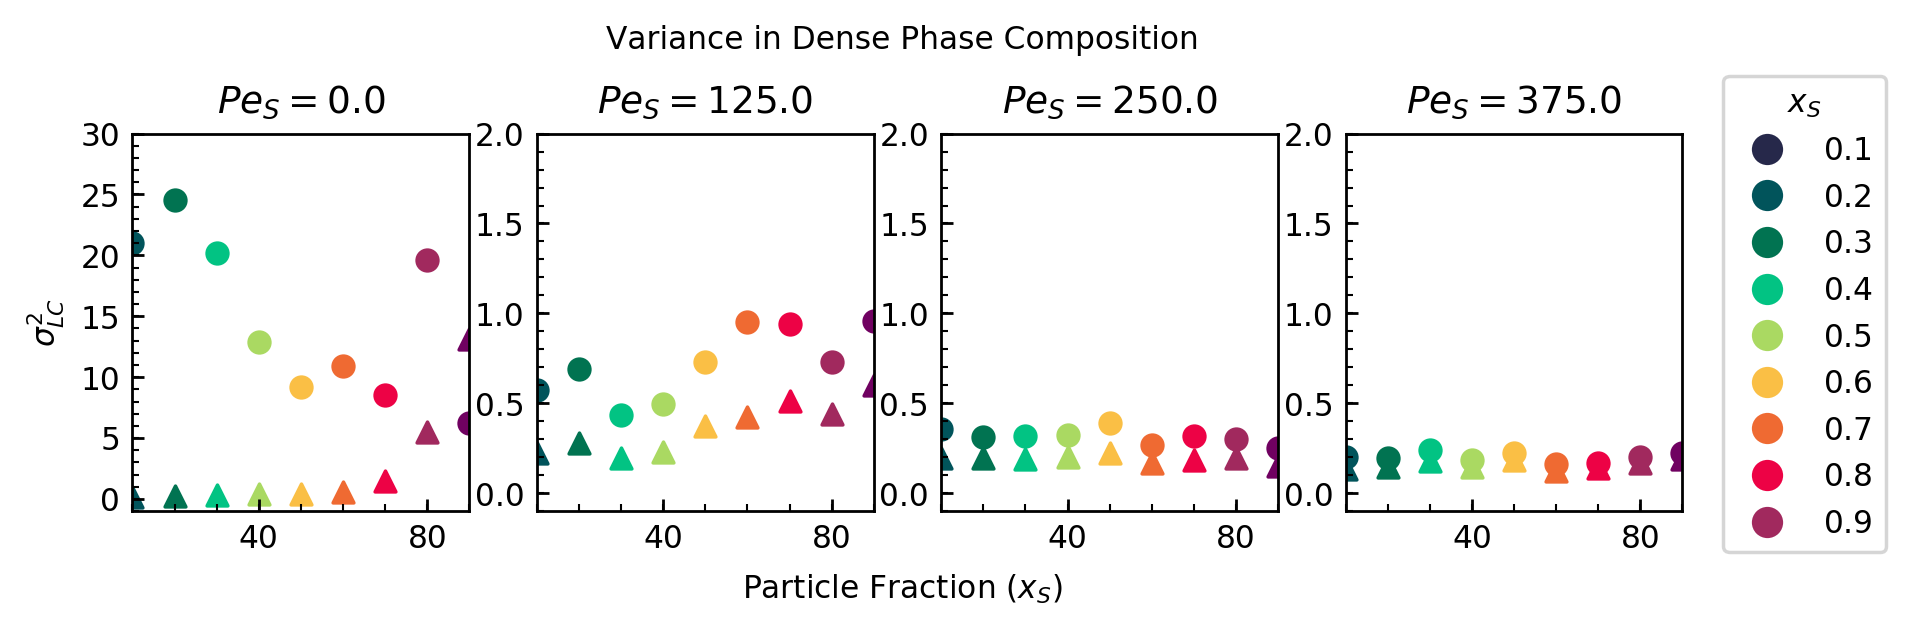

In [22]:
dnAVar = []
dnBVar = []

for i in xrange(numFiles):
    dnAVar.append((stdErr['Dense_A'][i])**2)
    dnBVar.append((stdErr['Dense_B'][i])**2)
    
print("Standard deviation of %A particles in dense phase: {}").format(stdErr['Dense_A'][0])
print("Variance of %A particles in dense phase: {}").format(stdErr['Dense_A'][0]**2)

# Let's plot variance of each particle type in dense phase:
fig, ax = plt.subplots(1, 4, figsize=(8, 2))
for i in xrange(numFiles):
    for j in xrange(len(distPeSlow)):
        if params['peA'][i] == distPeSlow[j] and params['xA'][i] != 100 and params['xA'][i] != 0:
            ax[j].scatter(params['xA'][i], dnAVar[i],
                          c=getCol(params['xA'][i]),
                          marker='o'
                         )
            ax[j].scatter(params['xA'][i], dnBVar[i],
                          c=getCol(params['xA'][i]),
                          marker='^'
                         )
            # Set x axis values
            ax[j].set_xlim(10, 90)
            ax[j].xaxis.set_major_locator(MultipleLocator(40))
            ax[j].xaxis.set_minor_locator(MultipleLocator(10))
            # Set y axis values
            ax[j].set_ylim(-5, 30)
            ax[j].yaxis.set_major_locator(MultipleLocator(5))
            ax[j].yaxis.set_minor_locator(MultipleLocator(1))
            ax[j].set_title(r'$Pe_{S}=$' + str(params['peA'][i]))
            
# Reset axis values if need be:
ax[0].set_ylim(-1, 30)

ax[1].set_ylim(-0.1, 2)
ax[1].yaxis.set_major_locator(MultipleLocator(0.5))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))

ax[2].set_ylim(-0.1, 2)
ax[2].yaxis.set_major_locator(MultipleLocator(0.5))
ax[2].yaxis.set_minor_locator(MultipleLocator(0.1))

ax[3].set_ylim(-0.1, 2)
ax[3].yaxis.set_major_locator(MultipleLocator(0.5))
ax[3].yaxis.set_minor_locator(MultipleLocator(0.1))
            
ax[0].set_ylabel(r'$\sigma_{LC}^{2}$')
fig.text(0.51, 1.05, 'Variance in Dense Phase Composition', ha='center')
fig.text(0.51, -0.05, r'Particle Fraction $(x_{S})$', ha='center')

msz = 10
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[0], markersize=msz, label=r'$0.1$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[1], markersize=msz, label=r'$0.2$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[2], markersize=msz, label=r'$0.3$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[3], markersize=msz, label=r'$0.4$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[4], markersize=msz, label=r'$0.5$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[5], markersize=msz, label=r'$0.6$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[6], markersize=msz, label=r'$0.7$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[7], markersize=msz, label=r'$0.8$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[8], markersize=msz, label=r'$0.9$')]
plt.legend(title=r'$x_{S}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.65, -0.15))

plt.show()

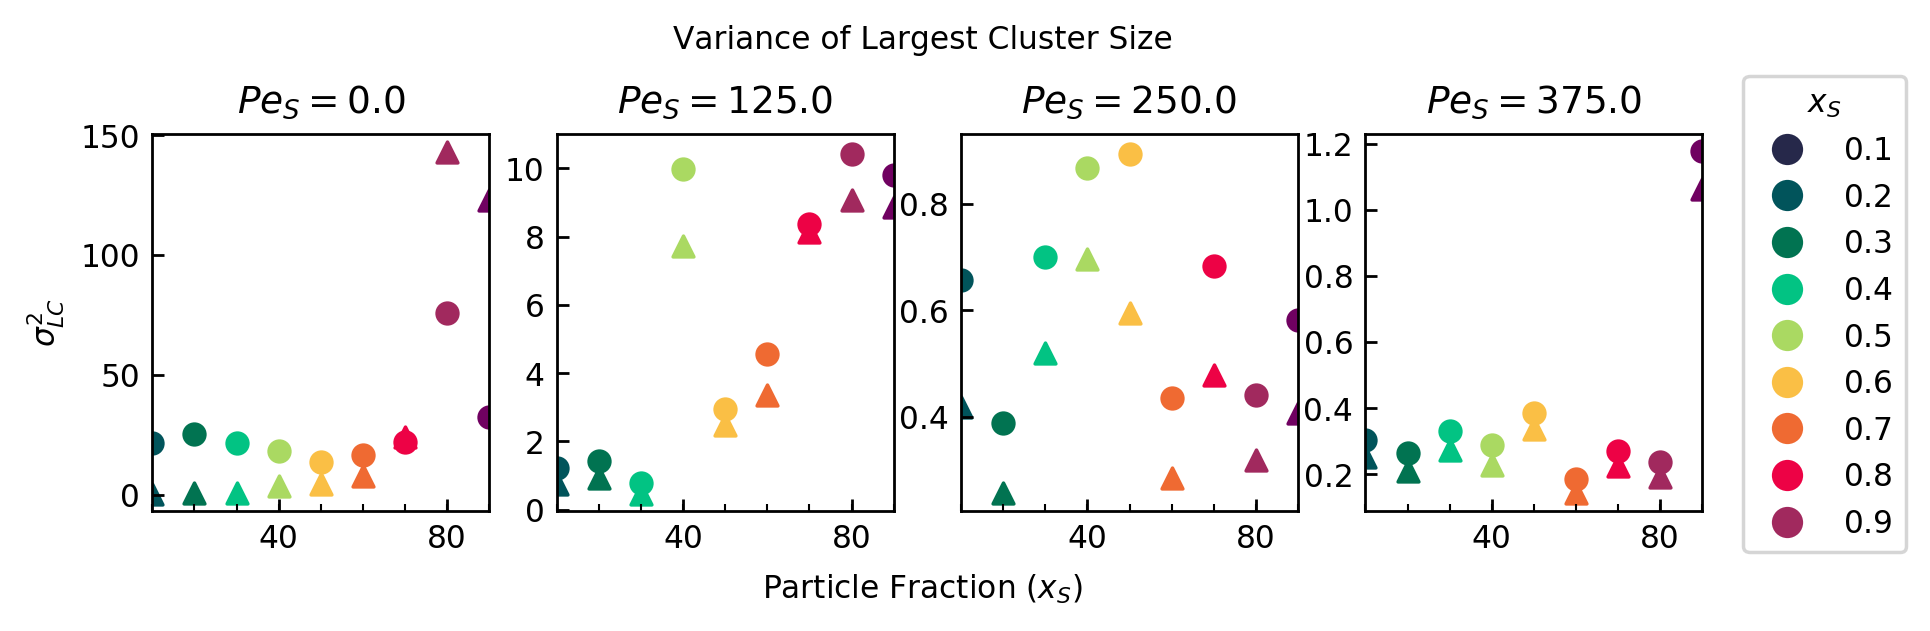

In [21]:
# Now we can look at the largest cluster as a function of particle type:
lcAVar = []
lcBVar = []

for i in xrange(numFiles):
    lcAVar.append((stdErr['Lc_numA'][i])**2)
    lcBVar.append((stdErr['Lc_numB'][i])**2)
    
# print("Standard deviation of %A particles in dense phase: {}").format(stdErr['Dense_A'][0])
# print("Variance of %A particles in dense phase: {}").format(stdErr['Dense_A'][0]**2)

# Let's plot variance of each particle type in dense phase:
fig, ax = plt.subplots(1, 4, figsize=(8, 2))
for i in xrange(numFiles):
    for j in xrange(len(distPeSlow)):
        if params['peA'][i] == distPeSlow[j] and params['xA'][i] != 100 and params['xA'][i] != 0:
            ax[j].scatter(params['xA'][i], lcAVar[i],
                          c=getCol(params['xA'][i]),
                          marker='o'
                         )
            ax[j].scatter(params['xA'][i], lcBVar[i],
                          c=getCol(params['xA'][i]),
                          marker='^'
                         )
            # Set x axis values
            ax[j].set_xlim(10, 90)
            ax[j].xaxis.set_major_locator(MultipleLocator(40))
            ax[j].xaxis.set_minor_locator(MultipleLocator(10))
            # Set y axis values
#             ax[j].set_ylim(-5, 30)
#             ax[j].yaxis.set_major_locator(MultipleLocator(5))
#             ax[j].yaxis.set_minor_locator(MultipleLocator(1))
            ax[j].set_title(r'$Pe_{S}=$' + str(params['peA'][i]))
            
# Reset axis values if need be:
# ax[0].set_ylim(-1, 30)

# ax[1].set_ylim(-0.1, 2)
# ax[1].yaxis.set_major_locator(MultipleLocator(0.5))
# ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))

# ax[2].set_ylim(-0.1, 2)
# ax[2].yaxis.set_major_locator(MultipleLocator(0.5))
# ax[2].yaxis.set_minor_locator(MultipleLocator(0.1))

# ax[3].set_ylim(-0.1, 2)
# ax[3].yaxis.set_major_locator(MultipleLocator(0.5))
# ax[3].yaxis.set_minor_locator(MultipleLocator(0.1))
            
ax[0].set_ylabel(r'$\sigma_{LC}^{2}$')
fig.text(0.51, 1.05, 'Variance of Largest Cluster Size', ha='center')
fig.text(0.51, -0.05, r'Particle Fraction $(x_{S})$', ha='center')

msz = 10
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[0], markersize=msz, label=r'$0.1$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[1], markersize=msz, label=r'$0.2$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[2], markersize=msz, label=r'$0.3$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[3], markersize=msz, label=r'$0.4$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[4], markersize=msz, label=r'$0.5$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[5], markersize=msz, label=r'$0.6$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[6], markersize=msz, label=r'$0.7$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[7], markersize=msz, label=r'$0.8$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[8], markersize=msz, label=r'$0.9$')]
plt.legend(title=r'$x_{S}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.65, -0.15))

plt.show()